<h1 style="text-align:center; font-family: Arial; font-weight: normal">Monsoon Credit Tech Case study</h1>


<h2 style="text-align:center; font-family: Italic; font-weight: normal">July 7, 2023</h2>


<h2 style="text-align:Left; font-family: Arial; font-weight: bold">1 Hire-a-thon problem statement</h2>


<div style="margin: 0 auto; width: 50%; border-top: 3px solid black;"></div>


<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.1 Problem Description: </h3>


Objective of this problems is to accurately predict ‘Dependent_Variable’

<div style="margin: 0 auto; width: 50%; border-top: 3px solid black;"></div>


<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.2 Analysis of Basic Metrics: </h3>


<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.2.1 Libraries Import: </h3>


In [1]:
# Importing Necessary Libraries
import warnings
warnings.simplefilter('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import * 
import math as m 



<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.2.2 Sample Records: </h3>


In [2]:
# Importing the Required Dataset
X_train = pd.read_csv(r"E:\AI-ML PYTHON\Foundation\Z_dataset\DS Test\DS Test\Training\X_train.csv")
X_train.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [3]:
X_train.shape

(33050, 44)

In [4]:
Y_train = pd.read_csv(r"E:\AI-ML PYTHON\Foundation\Z_dataset\DS Test\DS Test\Training\Y_train.csv")
Y_train

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0
...,...,...
33045,Candidate_26099,0
33046,Candidate_33316,0
33047,Candidate_36027,0
33048,Candidate_3169,1


In [5]:
Y_train['Dependent_Variable'].value_counts() 

0    22844
1    10206
Name: Dependent_Variable, dtype: int64

In [6]:
Y_train.shape 

(33050, 2)

 - We have checked the X_train and Y_train datasets has equal no. of rows or not, As they both contains equal no. of rows 
 - X_train has 44 features and 33050 rows 
 - Y_train has 0 and 1 labels with balanced proportions. The general Thumb rule is if minority class consists less than 10-20 percent to the total size then it is considered imbalanced dataset. so it is not a imbalanced dataset.

In [7]:
X_test = pd.read_csv("E:\AI-ML PYTHON\Foundation\Z_dataset\DS Test\DS Test\Test\X_test.csv")
X_test.shape 

(11017, 44)

<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.2.3     Existing Datatypes: </h3>


In [8]:
# checking for existing datatypes and missing values
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  33050 non-null  object 
 1   C1         33050 non-null  int64  
 2   C2         33050 non-null  int64  
 3   C3         33050 non-null  int64  
 4   C4         33050 non-null  int64  
 5   C5         33050 non-null  int64  
 6   C6         33050 non-null  bool   
 7   C7         33050 non-null  int64  
 8   C8         33050 non-null  bool   
 9   N1         33050 non-null  float64
 10  N2         28438 non-null  float64
 11  N3         32685 non-null  float64
 12  N4         28444 non-null  float64
 13  N5         28444 non-null  float64
 14  N6         32685 non-null  float64
 15  N7         32623 non-null  float64
 16  N8         33050 non-null  int64  
 17  N9         33050 non-null  int64  
 18  N10        32623 non-null  float64
 19  N10.1      32623 non-null  float64
 20  N11   

<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.2.4 Missing values: </h3>


In [9]:
X_train.isna().sum() 

Unique_ID        0
C1               0
C2               0
C3               0
C4               0
C5               0
C6               0
C7               0
C8               0
N1               0
N2            4612
N3             365
N4            4606
N5            4606
N6             365
N7             427
N8               0
N9               0
N10            427
N10.1          427
N11            716
N12           4614
N14            608
N15            427
N16           4606
N17           4606
N18           4606
N19           4571
N20           4571
N21           4571
N22           4571
N23           2486
N24              0
N25          26779
N26          26779
N27          26779
N28          26779
N29          26779
N30          26779
N31          26779
N32          26830
N33              0
N34              0
N35            427
dtype: int64

In [10]:
Y_train.isna().sum() 

Unique_ID             0
Dependent_Variable    0
dtype: int64

In [11]:
X_test.isna().sum() 

Unique_ID       0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
N2           1489
N3            112
N4           1488
N5           1488
N6            112
N7            129
N8              0
N9              0
N10           129
N10.1         129
N11           218
N12          1491
N14           188
N15           129
N16          1488
N17          1488
N18          1488
N19          1471
N20          1471
N21          1471
N22          1471
N23           849
N24             0
N25          8879
N26          8879
N27          8879
N28          8879
N29          8879
N30          8879
N31          8879
N32          8905
N33             0
N34             0
N35           129
dtype: int64

In [12]:
Miss_val_cols = []  # considering the X_train columns
for col in X_train.columns:
    if X_train[col].isna().any():
        Miss_val_cols.append(col)

In [13]:
print(", ".join(Miss_val_cols))


N2, N3, N4, N5, N6, N7, N10, N10.1, N11, N12, N14, N15, N16, N17, N18, N19, N20, N21, N22, N23, N25, N26, N27, N28, N29, N30, N31, N32, N35


In [14]:
Miss_val_cols = []  # considering the X_test columns
for col in X_test.columns:
    if X_test[col].isna().any():
        Miss_val_cols.append(col)

In [15]:
print(", ".join(Miss_val_cols))


N2, N3, N4, N5, N6, N7, N10, N10.1, N11, N12, N14, N15, N16, N17, N18, N19, N20, N21, N22, N23, N25, N26, N27, N28, N29, N30, N31, N32, N35


 - so far most of the columns data types are numerical data type except C6 and C8 along with Unique_ID columns 
 - We can see that there are many missing values in most of the columns
 - The columns that has missing values are N2, N3, N4, N5, N6, N7, N10, N10.1, N11, N12, N14, N15, N16, N17, N18, N19, N20, N21, N22, N23, N25, N26, N27, N28, N29, N30, N31, N32 and N35

<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.2.5 Statistical Summary: </h3>


In [16]:
X_train.describe() 

,C1,C2,C3,C4,C5,C7,N1,N2,N3,N4,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,28438.000000,32685.000000,28444.000000,...,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6220.000000,33050.000000,33050.000000,32623.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,3.124932,19.97653,81.342710,3.359361,9.574075,...,20.084197,19.512199,0.526391,0.045288,7192.813526,2379.621620,0.744373,125.629394,224.313536,19.587254
std,0.399382,3.399024,12.013457,15.527474,1.320860,2.158905,8.11087,85.397795,0.411040,5.584756,...,16.045120,15.637882,2.144069,0.443838,6460.139952,3379.065104,50.764684,104.391919,186.513844,7.352667
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-194.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.45000,21.000000,3.200000,6.000000,...,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-31.000000,54.000000,98.740000,14.000000
50%,1.000000,1.000000,10.000000,10.000000,2.000000,4.000000,19.27500,53.000000,3.400000,9.000000,...,15.000000,14.000000,0.000000,0.000000,5000.000000,1108.440000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,4.000000,26.90000,112.000000,3.600000,13.000000,...,28.000000,27.000000,0.000000,0.000000,9500.000000,3408.750000,32.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,7.000000,48.00000,755.000000,4.400000,59.000000,...,120.000000,111.000000,42.000000,11.000000,60001.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000


 - There are some  attributes seems to be consisting outliers because of their median and mean values are off by some discrepancies considering their max values too

## 1.3 Visual Analysis

<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.3.1 Distribution of the data:
 </h3>


In [17]:
def univariate_plot(x,y):
    fig = plt.figure(figsize=(15,5))
    ax2 = fig.add_subplot(121)
    sns.boxplot(x,ax=ax2)
    ax = fig.add_subplot(122)
    sns.histplot(x,kde=True,ax=ax)
    ax.axvline(x.mean(), color='orange', linestyle='-',linewidth=1.5)
    ax.axvline(x.median(), color='red', linestyle='-.',linewidth=1.5)
    ax.axvline(x.mode()[0], color='green', linestyle='--',linewidth=1.5)
    ax.legend(labels=['kde','mean','median','mode'])
    ax.set_title(str(y))
    ax2.set_title(str(y))
    plt.show()

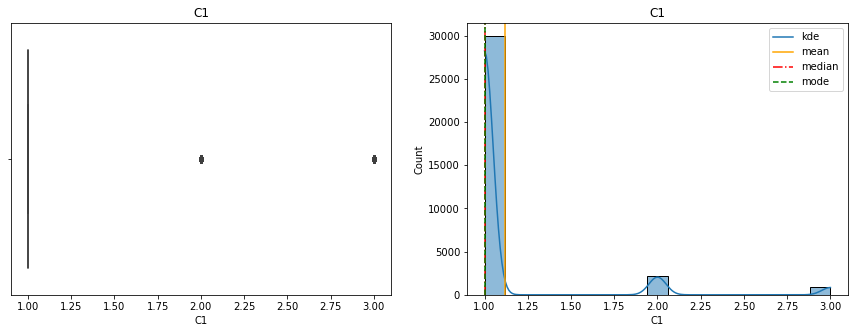

None


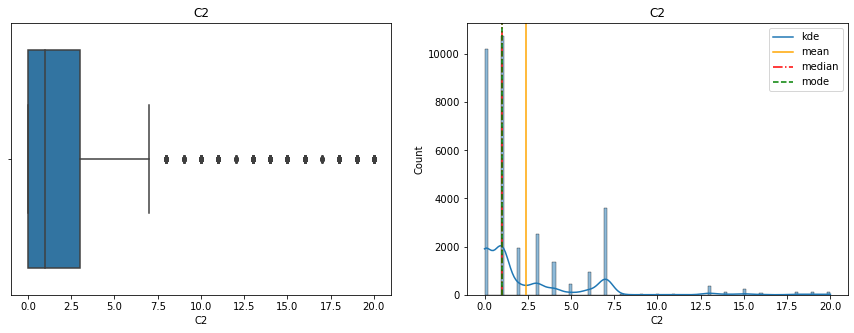

None


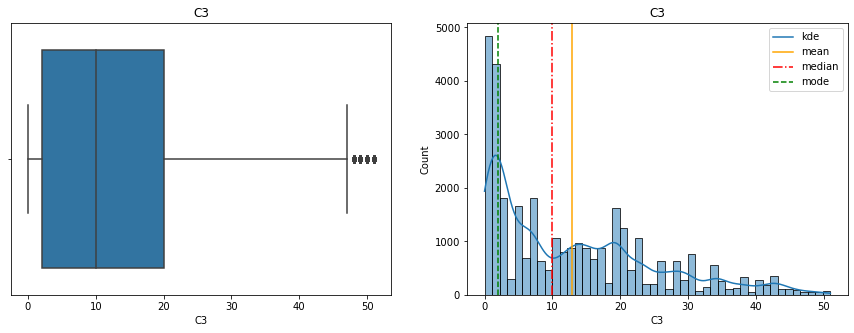

None


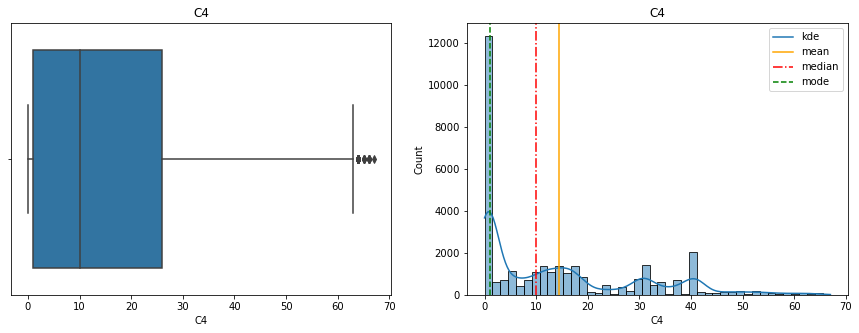

None


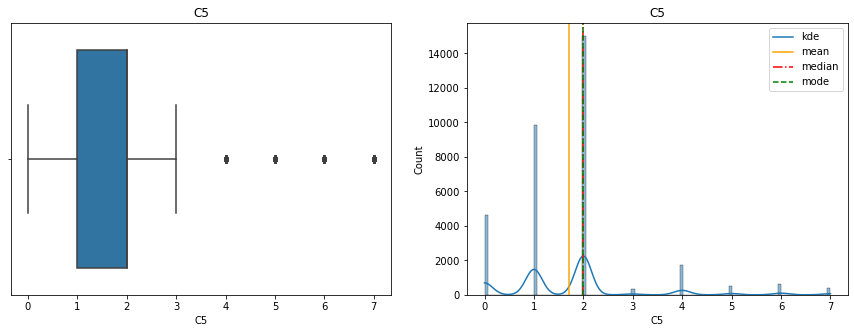

None


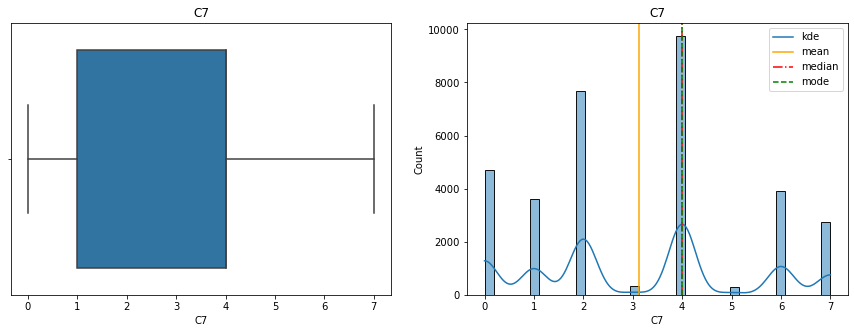

None


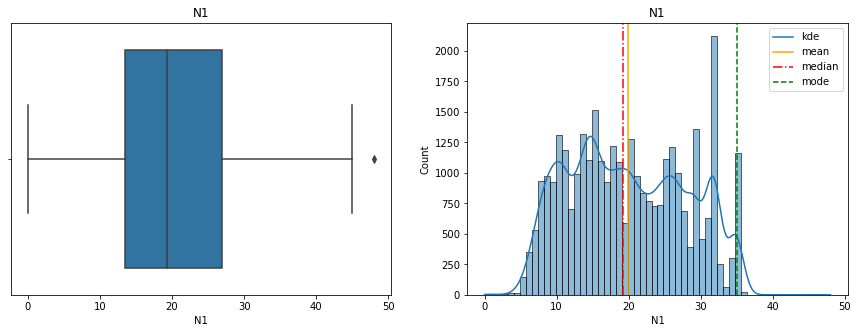

None


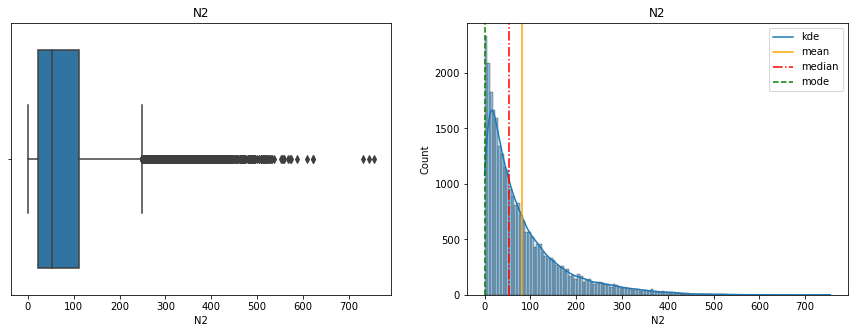

None


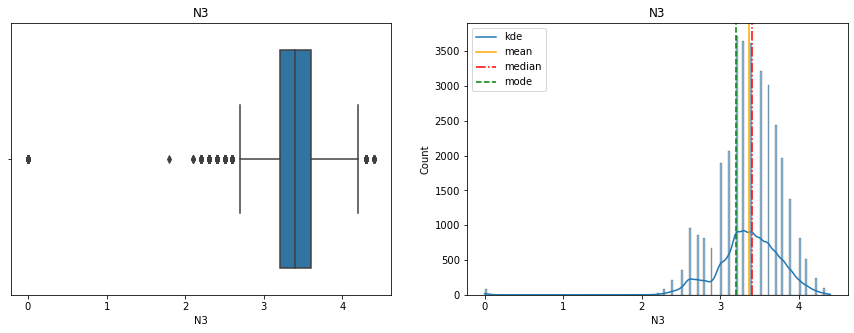

None


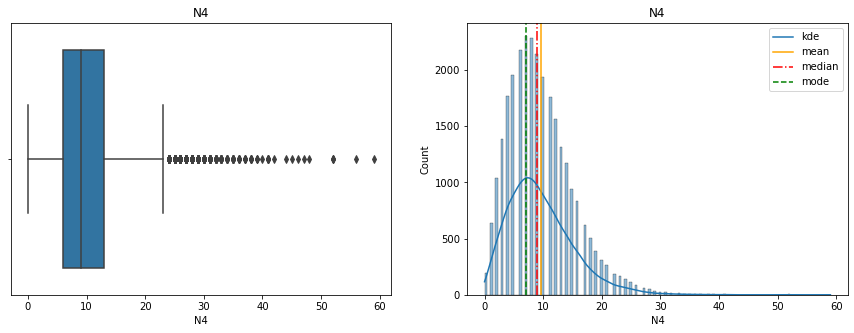

None


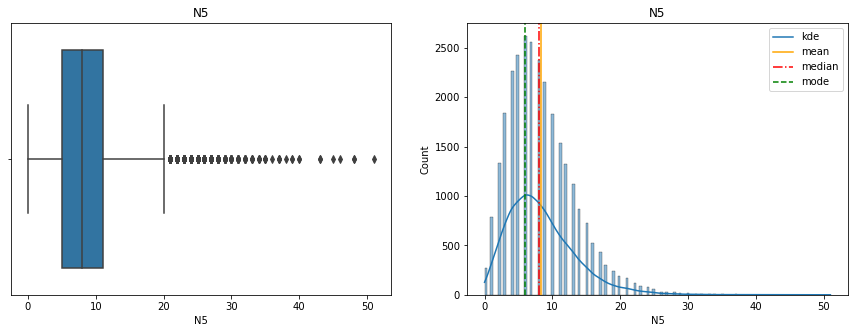

None


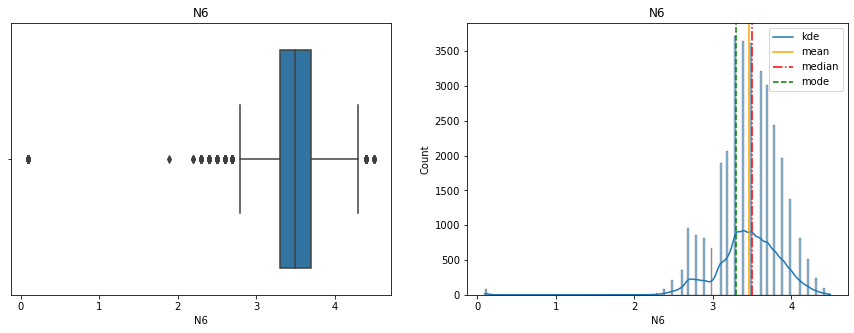

None


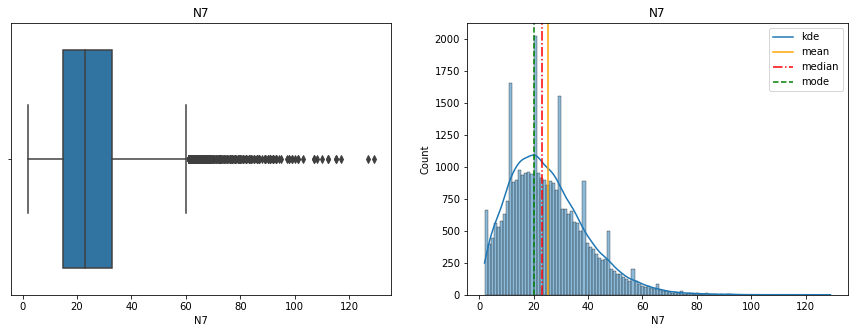

None


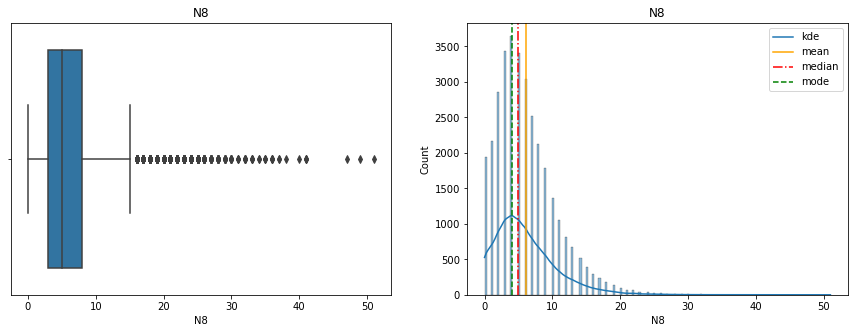

None


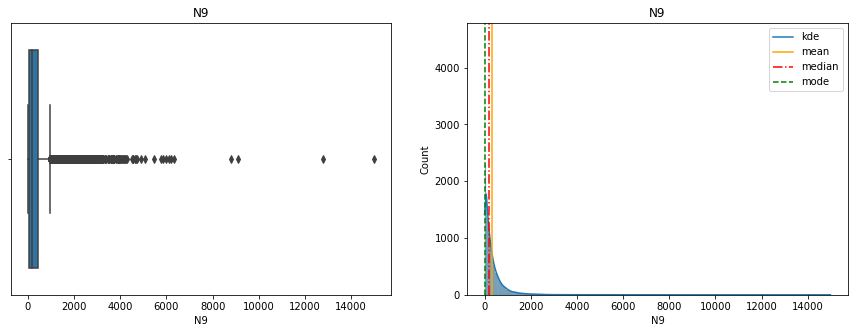

None


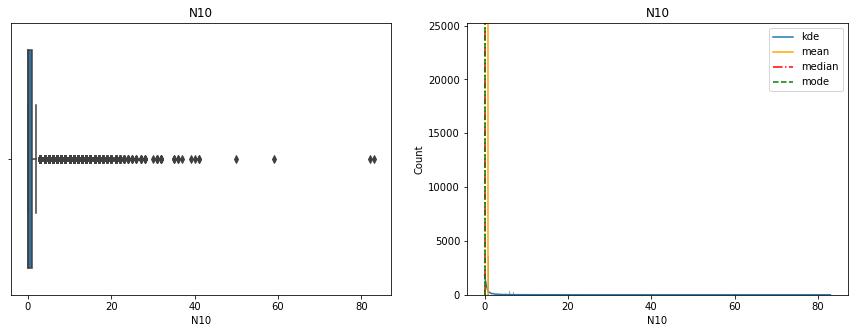

None


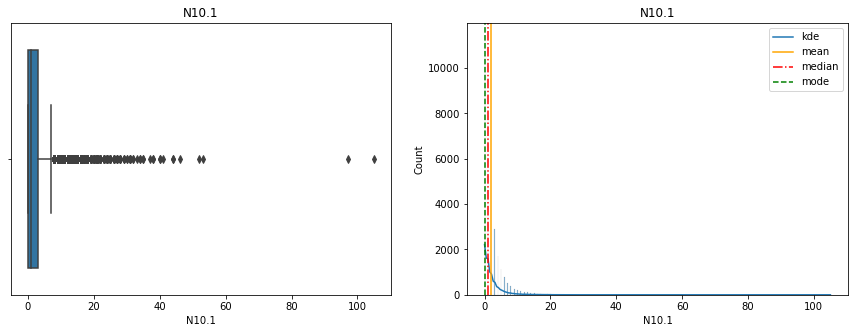

None


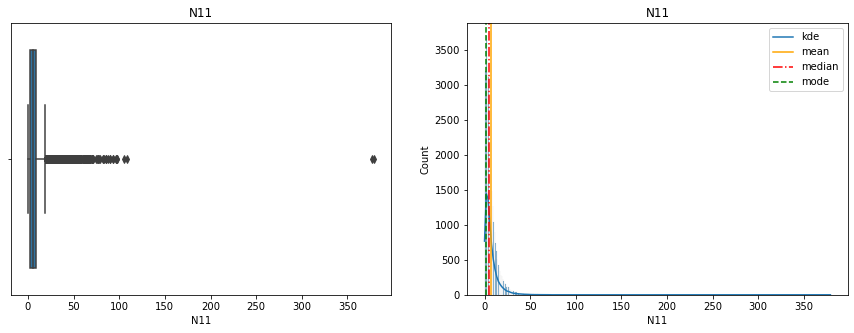

None


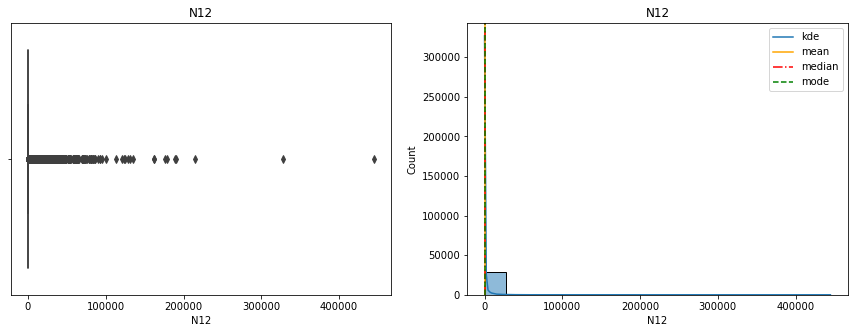

None


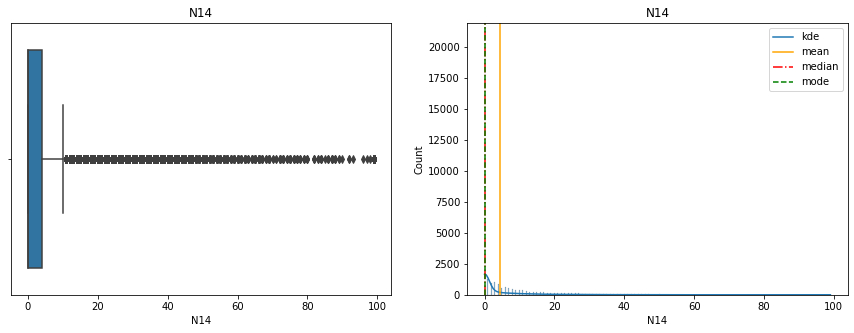

None


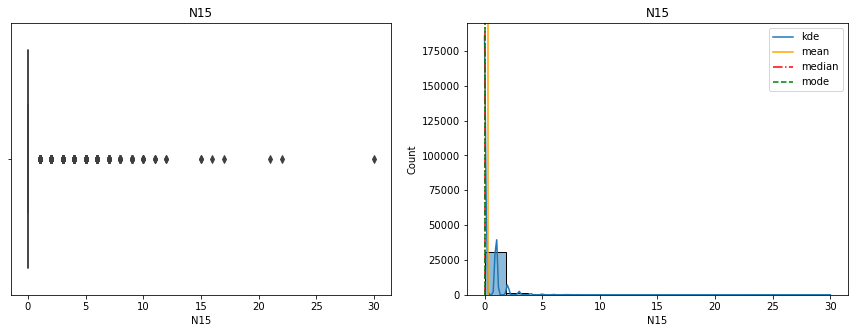

None


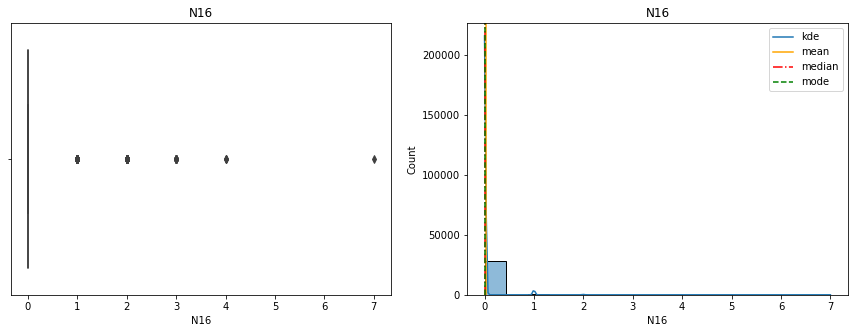

None


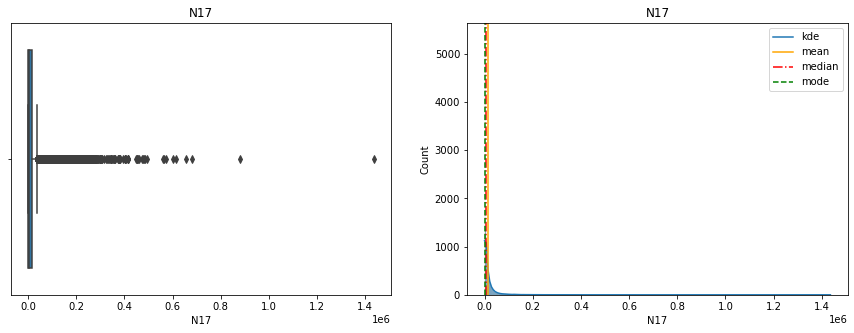

None


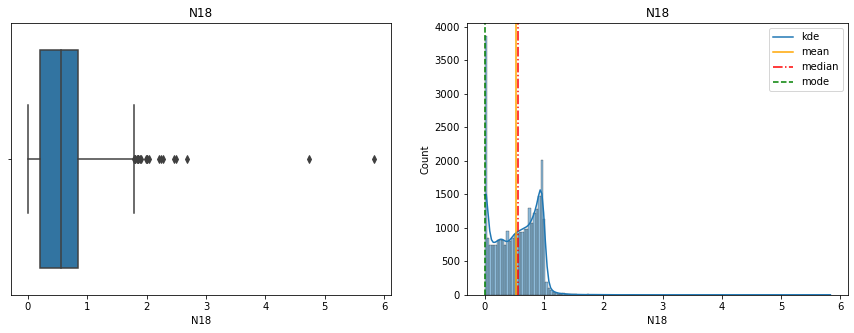

None


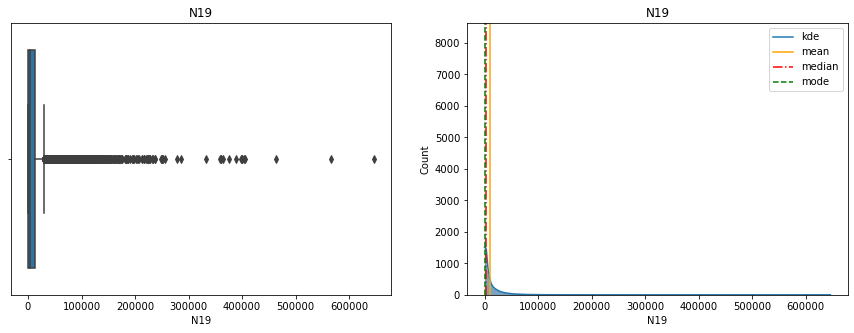

None


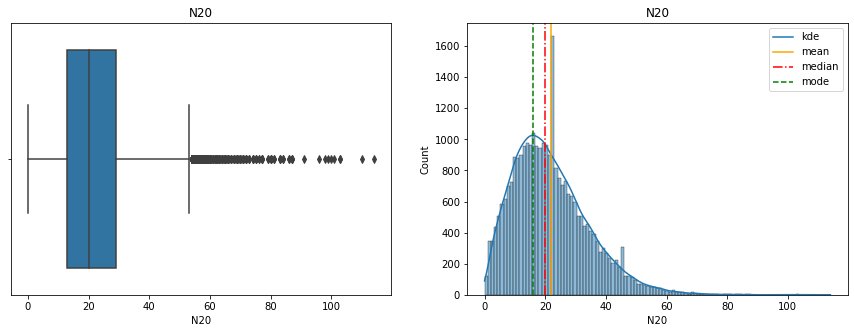

None


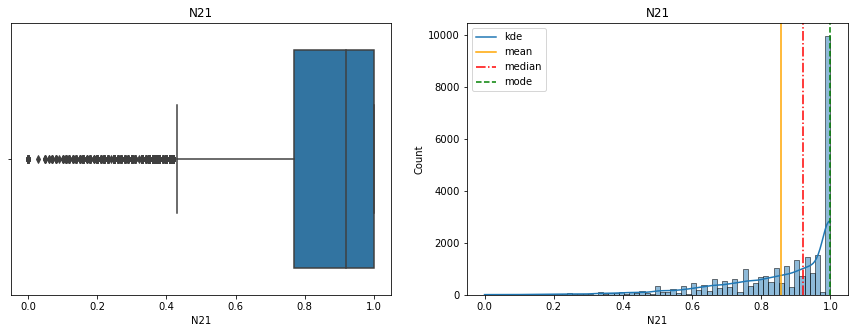

None


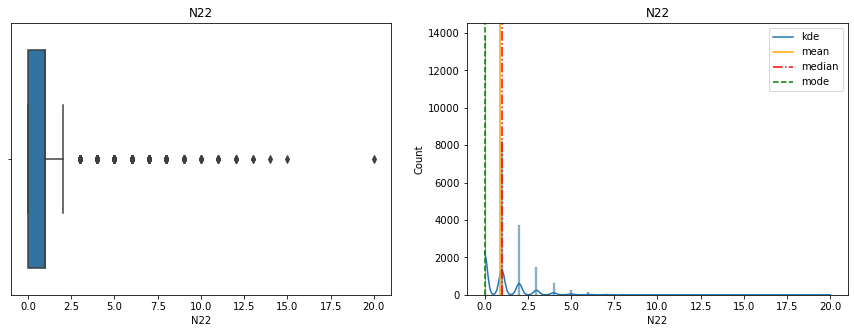

None


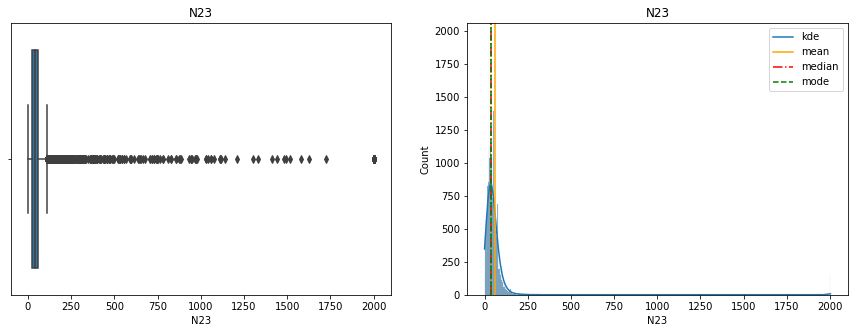

None


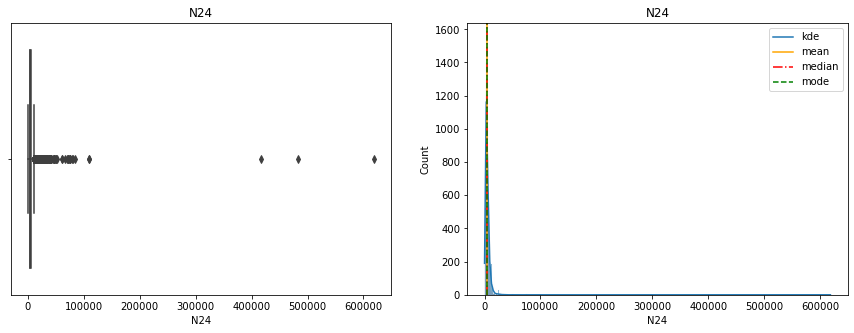

None


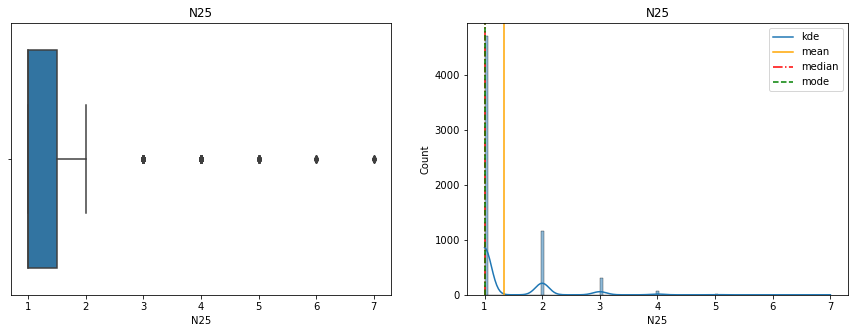

None


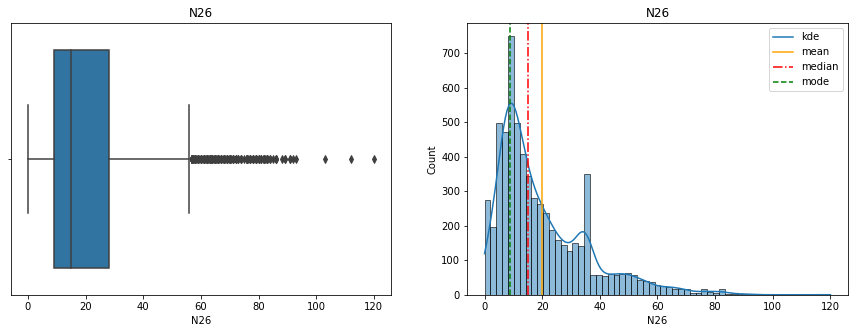

None


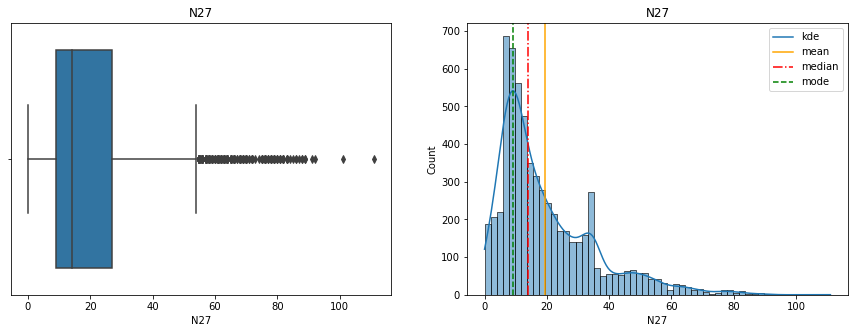

None


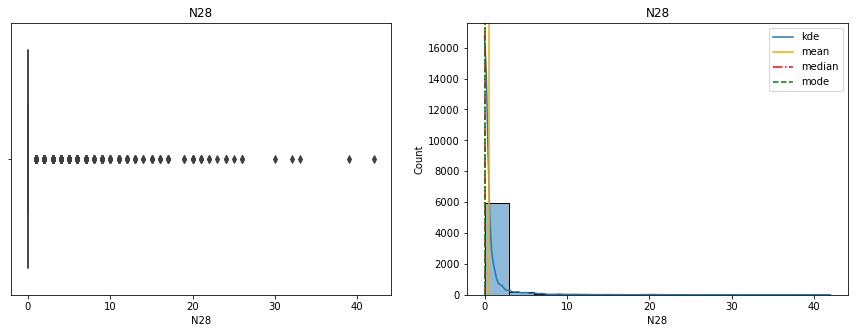

None


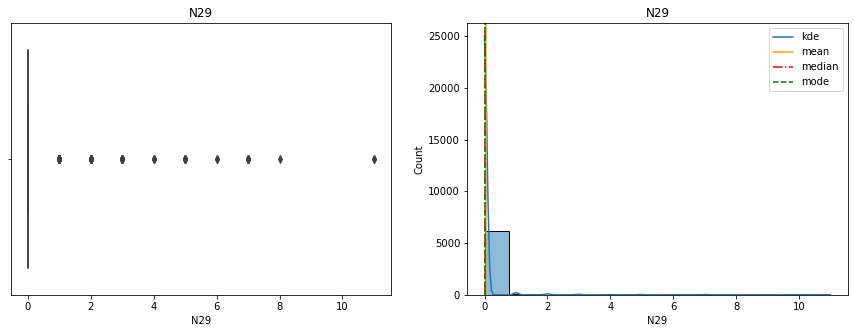

None


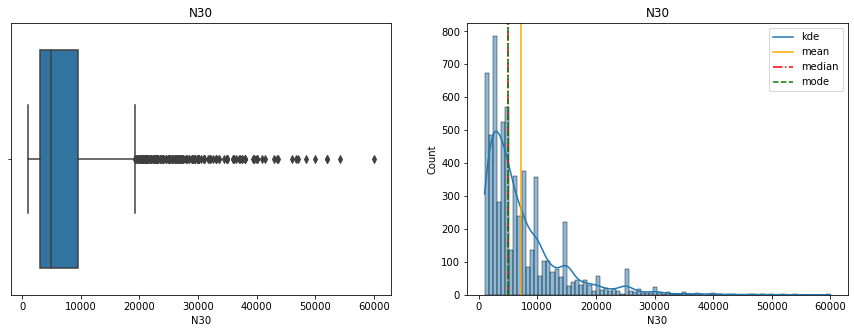

None


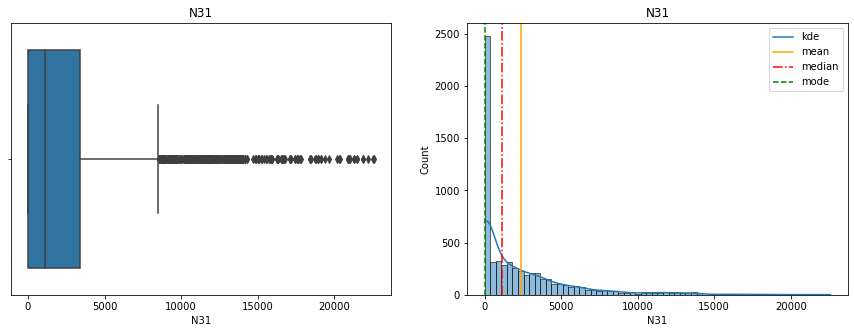

None


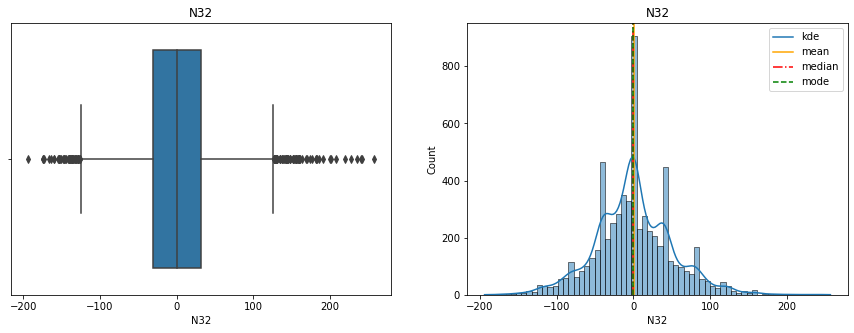

None


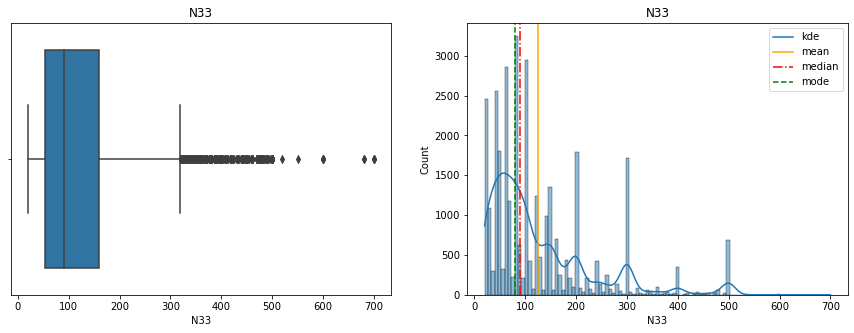

None


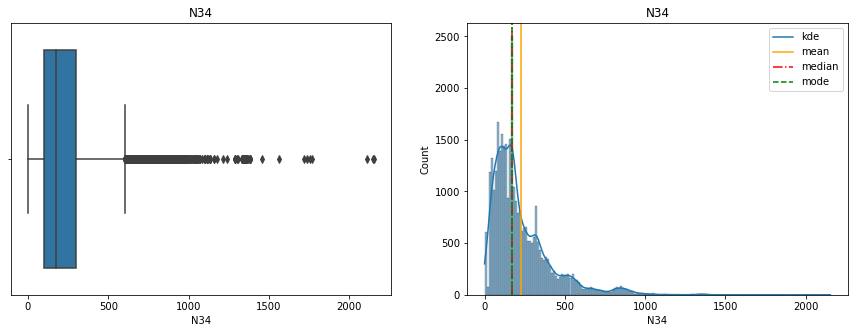

None


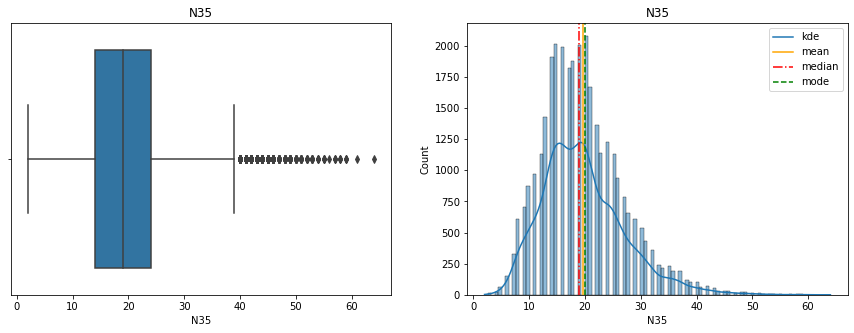

None


In [14]:
for i in list(X_train.select_dtypes(include=["number"]).columns):
    print(univariate_plot(X_train[i],i))

 - As we can see that there are many columns that are not normally distributed at all
 - Most of the columns are skewed or unevenly distributed
 - Generally not normally distributed data columns need to be transformed to do any statistical analysis to extract any inference from it especially while applying hypothesis testings using z,t,chisquare or annova tests as per the given problems or requirements since those tests checks for the normality.
 - But in this given data, there isn't any requirement and also it is unknown case study or data with masked columns.
 

<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.3.2 Outlier Detection & Treatment:
 </h3>


We can see that outliers are present in the many columns. We need to figure out a way to deal with them before starting with the tests.



We have multiple options available on how to proceed with these outlier values.

1. Try to understand if these values make any sense according to the business problem. If yes, then we can keep them as it is.
2. In case these outliers are some invalid values which do not make much sense, we can remove them using the IQR.
3. Or we can apply a log transformation or utilize capping and flooring techniques to address extreme values in the data and mitigate their impact on the analysis.

 - As the case study is unknown along with masked columns, we are not so sure about the business problem and retaining the outliers
 - So, we can remove the outliers but after i applied removing outliers technique in this data, the data size from 33050 rows is reduced to 857 rows, so which is huge drastic reduction of data and loss of information
 - we can apply flooring and capping technique by replacing the extreme values to the upper or lower bound values which will mitigate the outliers effect and retain the original distribution to some extent. 

In [18]:
threshold = 3.0  # z-score the values above than this threshold considered as outliers columns 
outlier_columns = X_train.select_dtypes(include=["number"]).columns[
    X_train.select_dtypes(include=["number"]).apply(lambda x: (x > threshold).any() | (x < -threshold).any())
]

def treating_outliers(X_train, column, X_test):
    lower_percentile = 0.05 # ad-hoc approach for taking this specific limits
    upper_percentile = 0.95
    
    lower_value = np.percentile(X_train[column], lower_percentile * 100)
    upper_value = np.percentile(X_train[column], upper_percentile * 100)

    X_train[column] = np.where(X_train[column] < lower_value, lower_value, X_train[column])
    X_train[column] = np.where(X_train[column] > upper_value, upper_value, X_train[column])
    
    l_v = np.percentile(X_test[column], lower_percentile * 100)
    u_v = np.percentile(X_test[column], upper_percentile * 100)

    X_test[column] = np.where(X_test[column] < l_v, l_v, X_test[column])
    X_test[column] = np.where(X_test[column] > u_v, u_v, X_test[column])



In [19]:
outlier_columns 

Index(['C2', 'C3', 'C4', 'C5', 'C7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7',
       'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15', 'N16', 'N17',
       'N18', 'N19', 'N20', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28',
       'N29', 'N30', 'N31', 'N32', 'N33', 'N34', 'N35'],
      dtype='object')

In [20]:
for column in outlier_columns:
    treating_outliers(X_train, column, X_test)


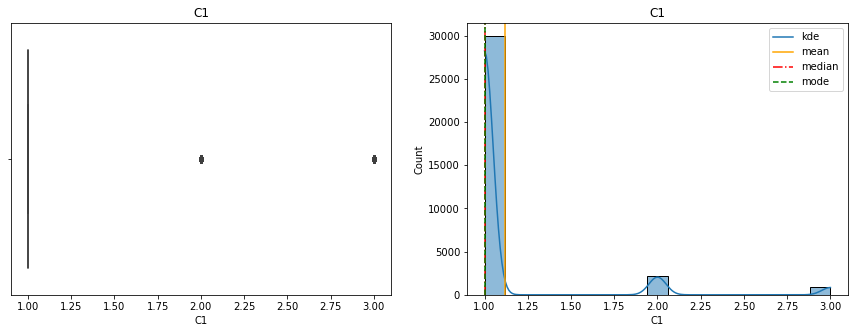

None


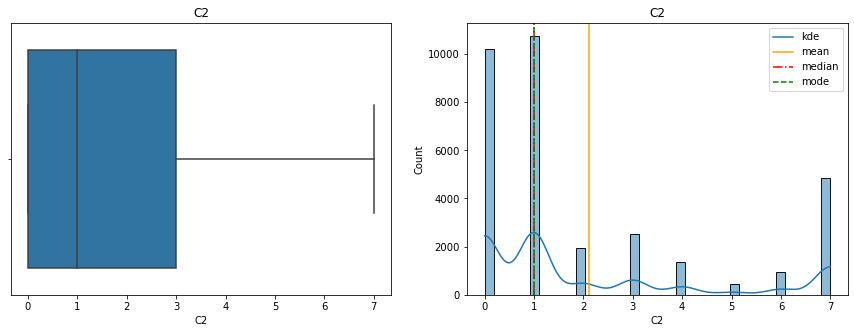

None


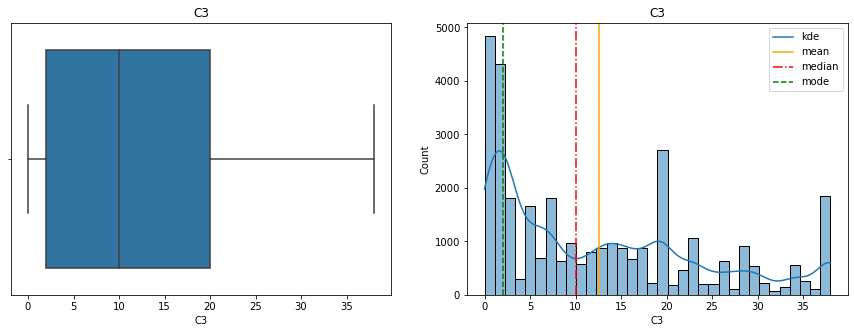

None


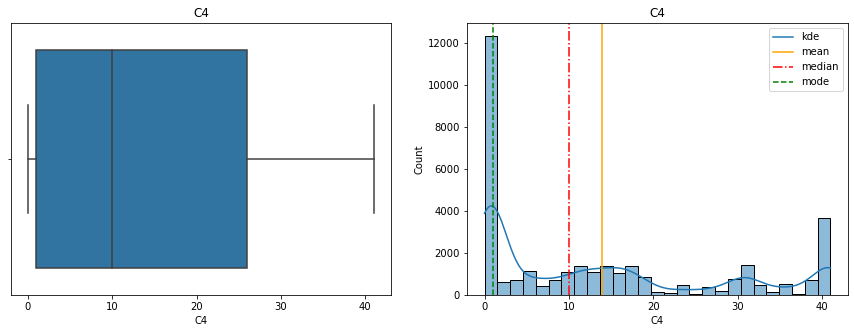

None


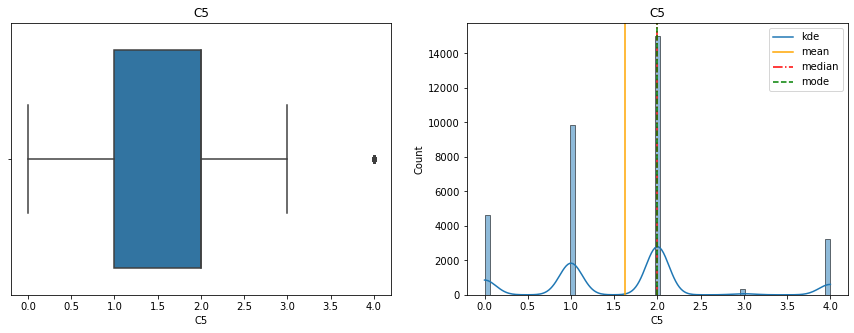

None


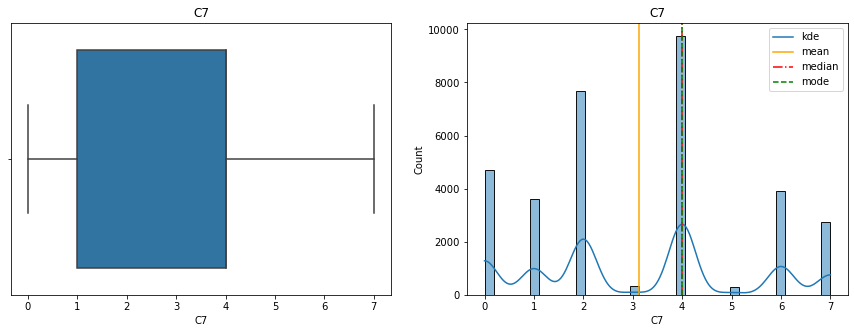

None


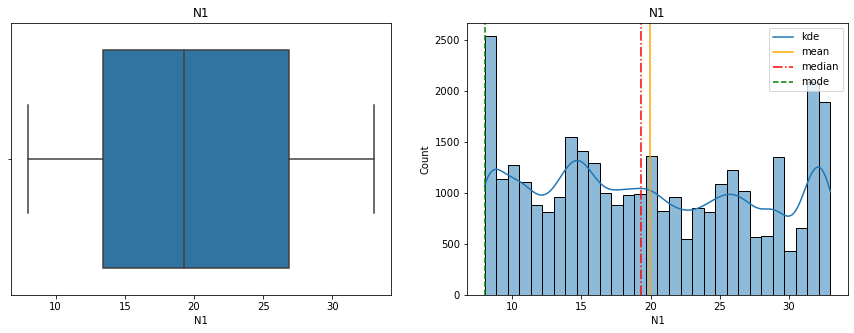

None


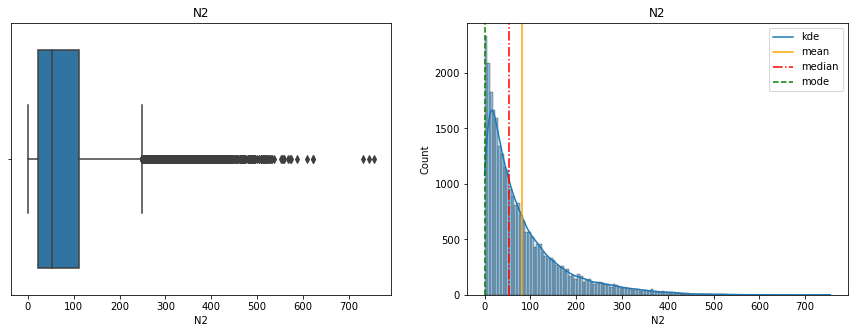

None


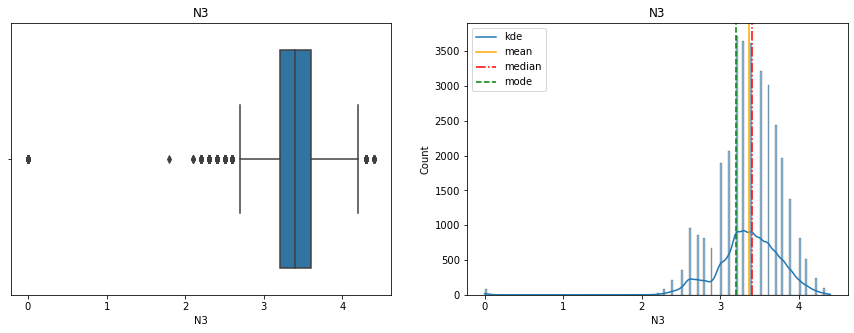

None


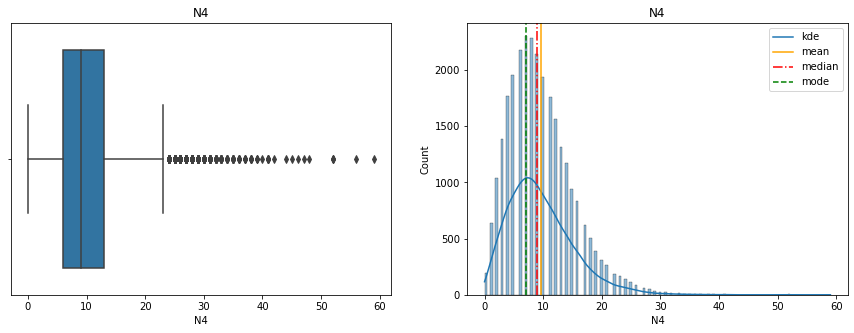

None


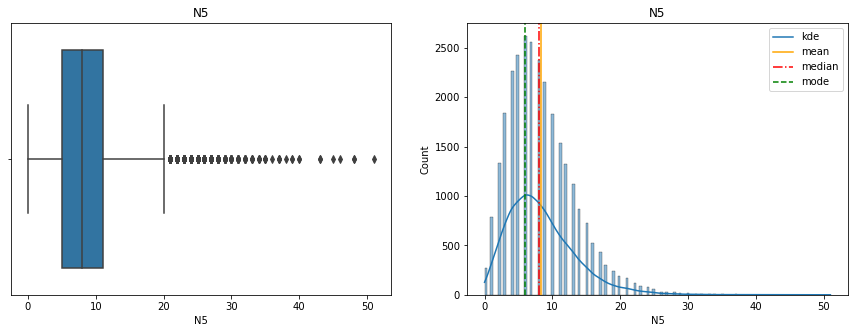

None


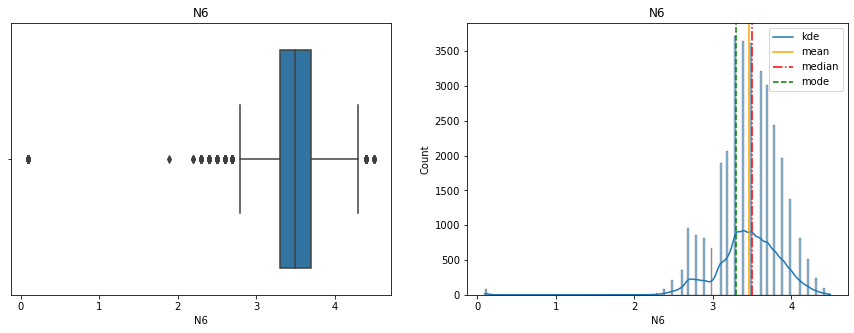

None


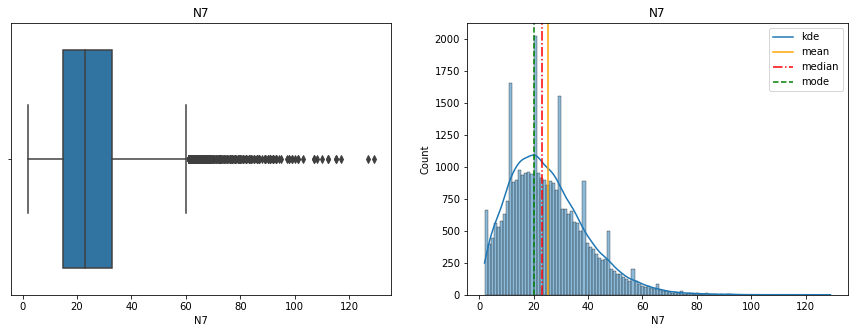

None


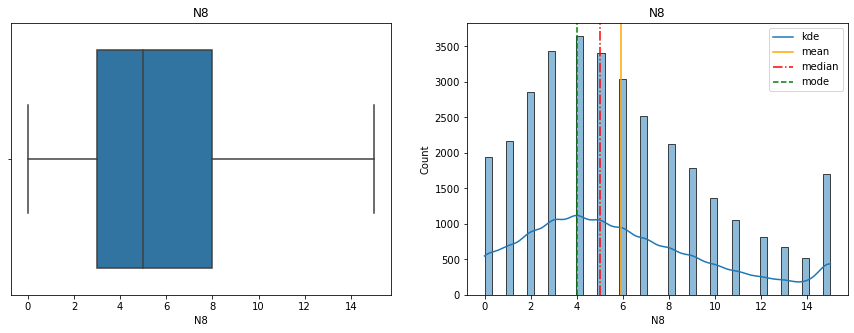

None


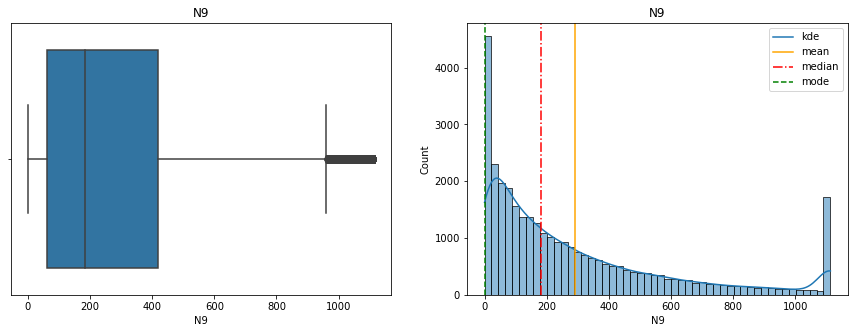

None


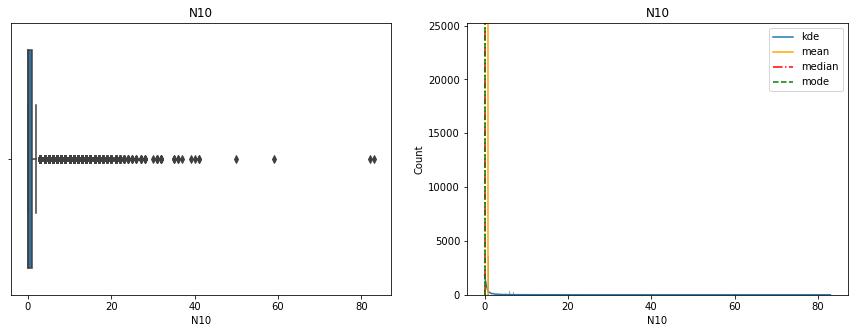

None


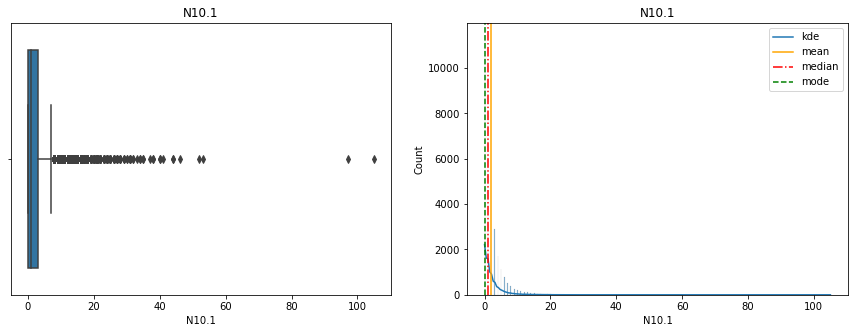

None


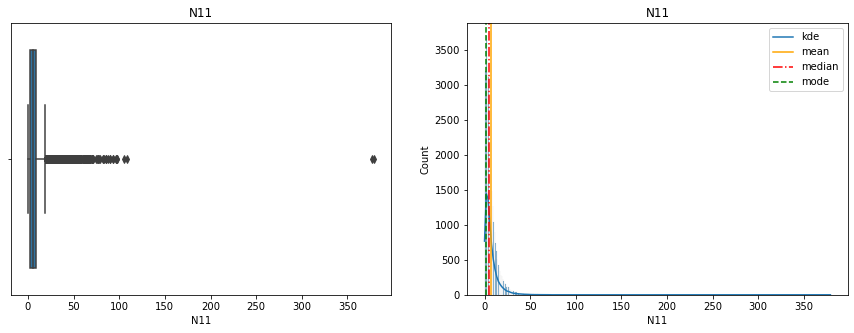

None


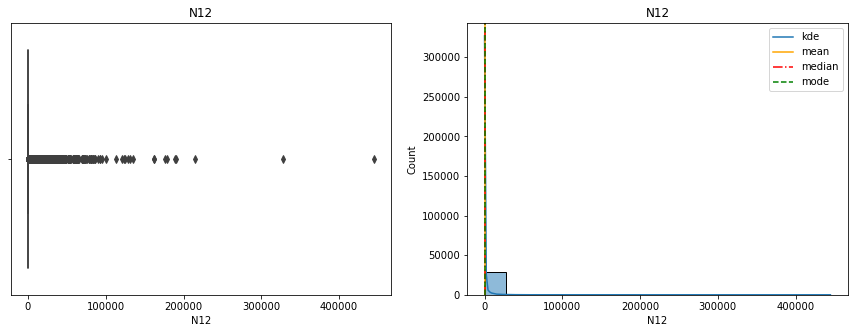

None


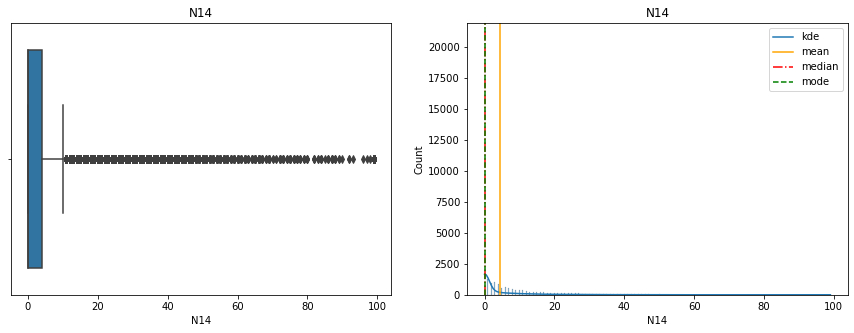

None


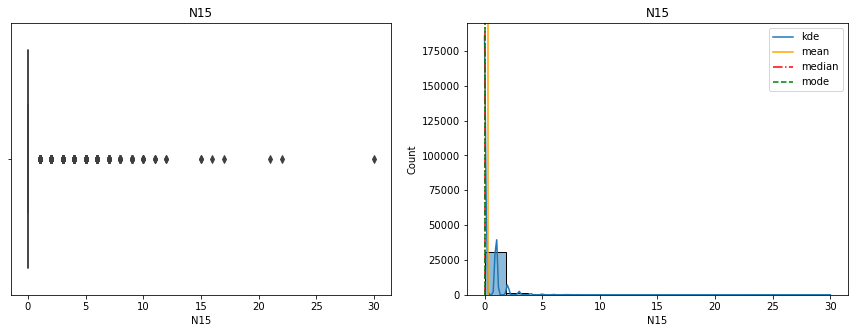

None


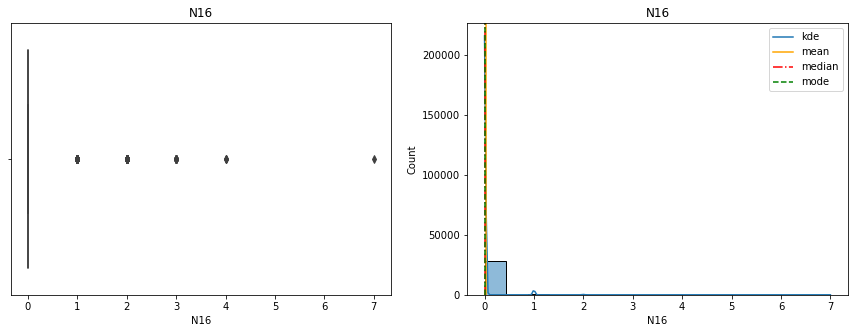

None


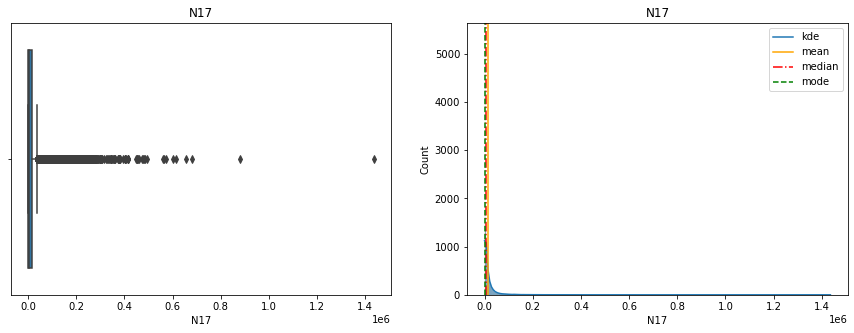

None


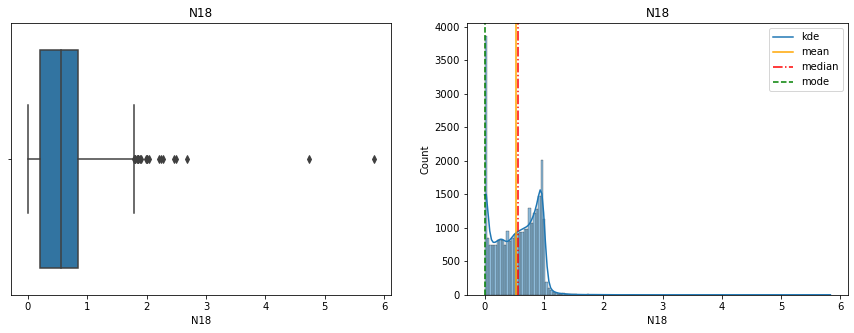

None


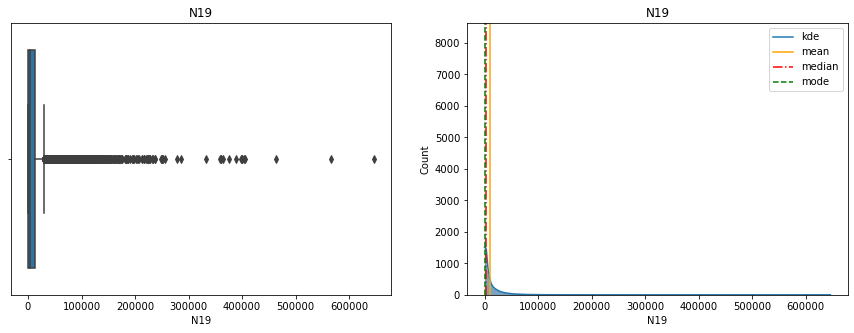

None


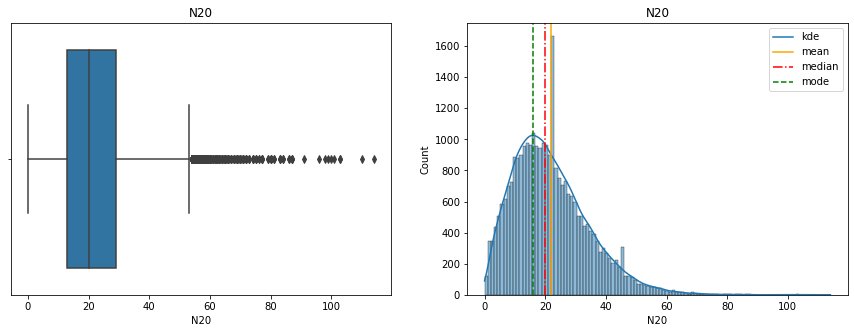

None


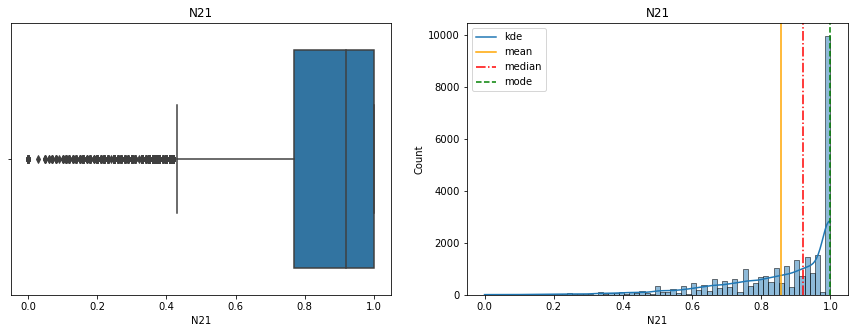

None


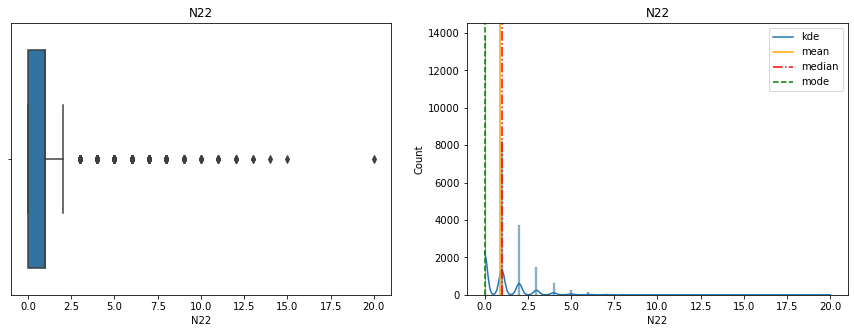

None


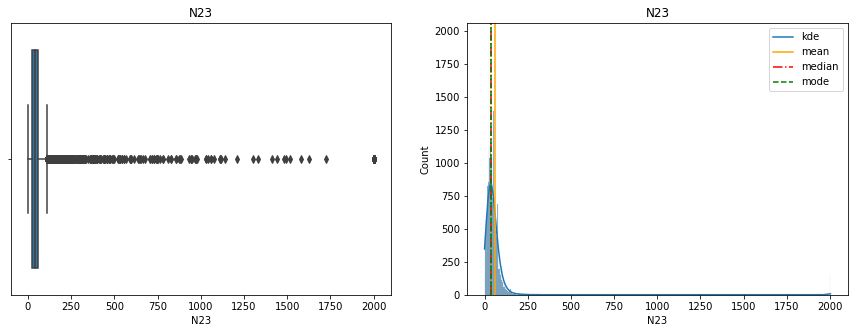

None


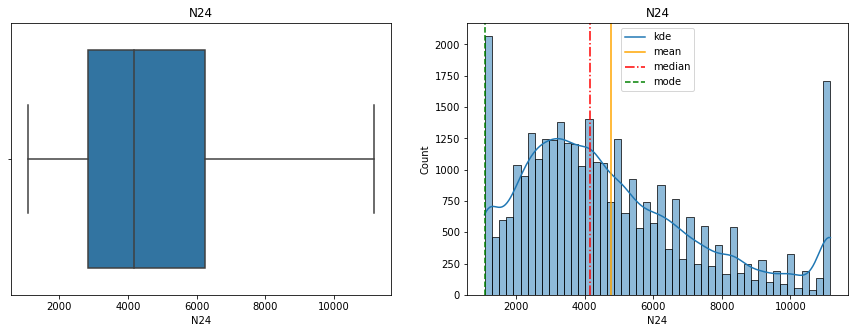

None


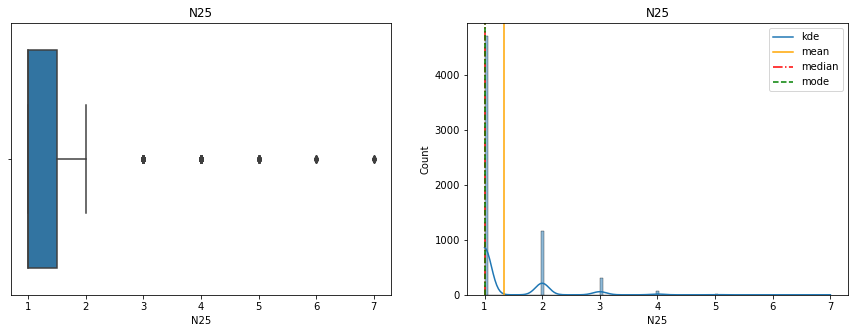

None


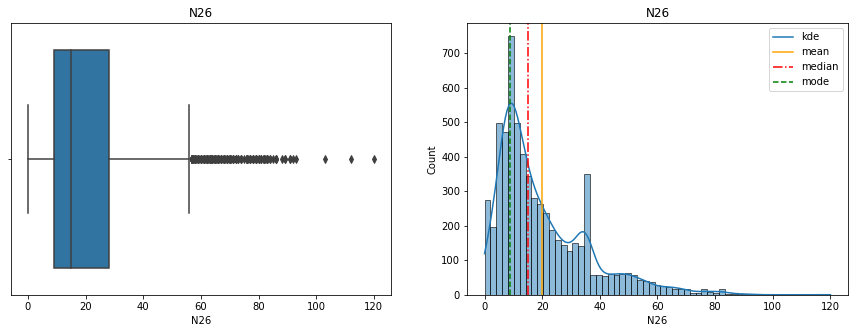

None


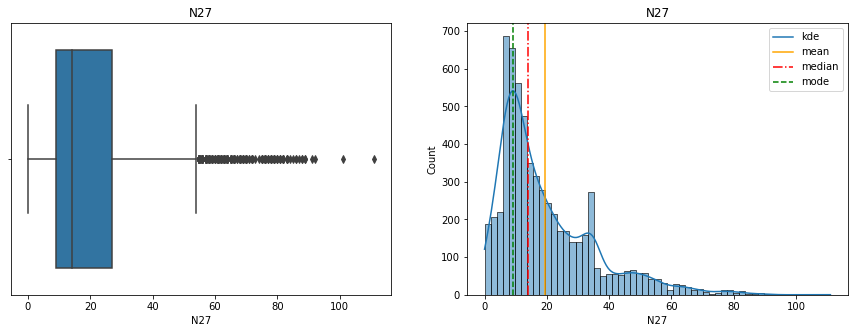

None


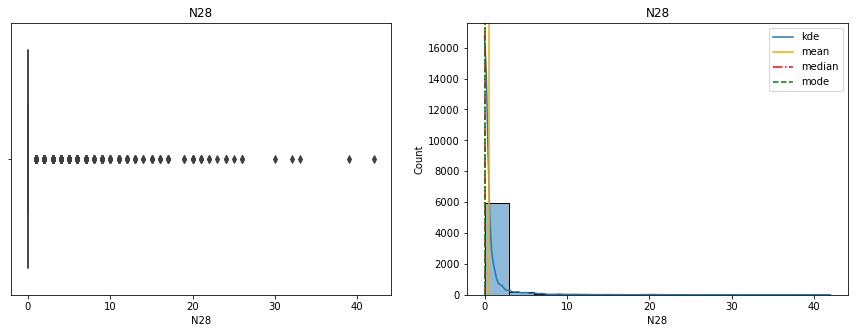

None


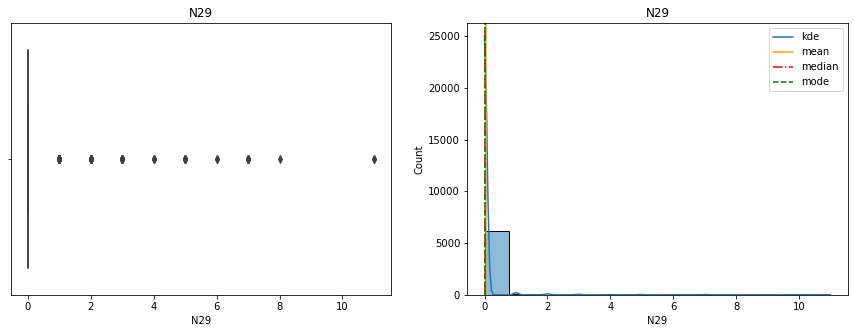

None


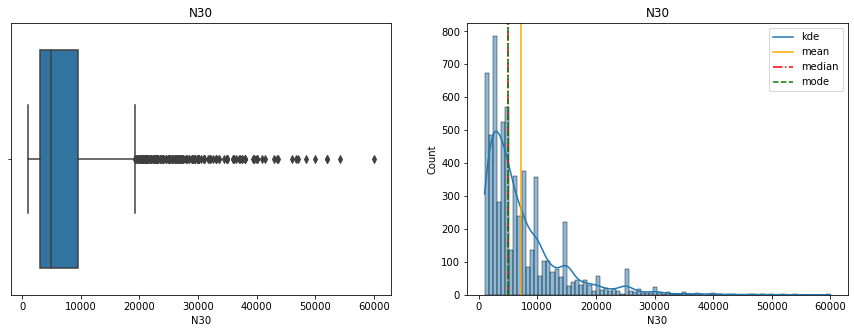

None


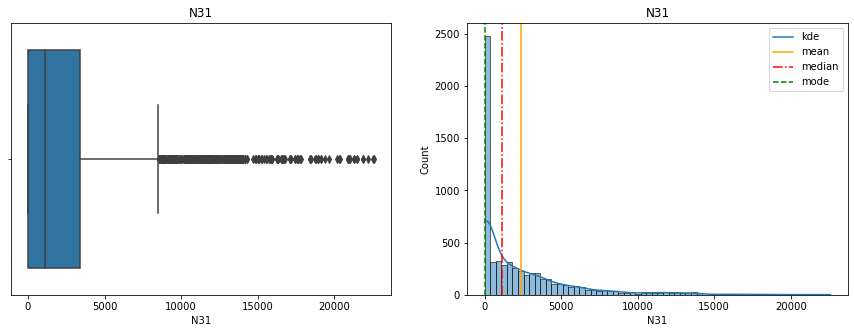

None


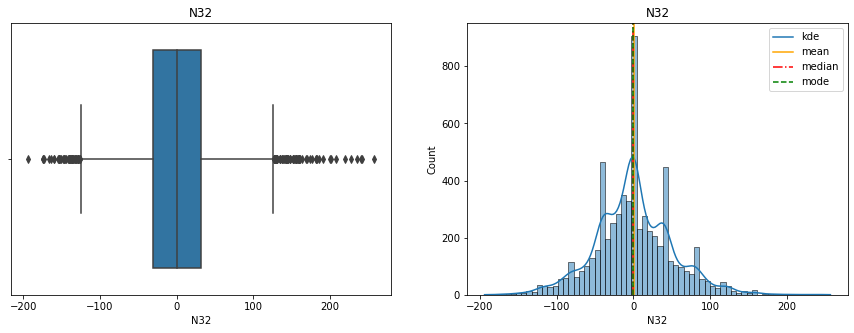

None


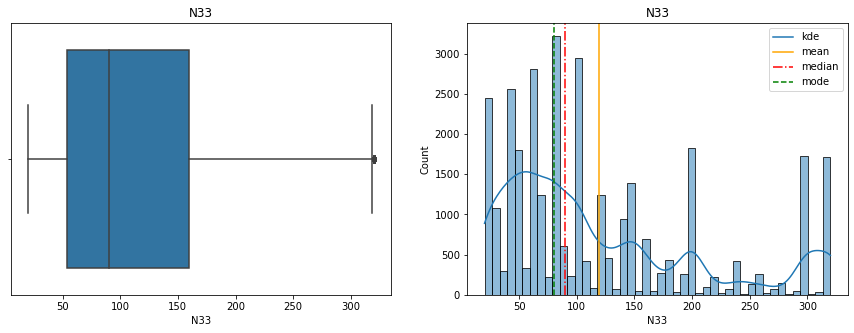

None


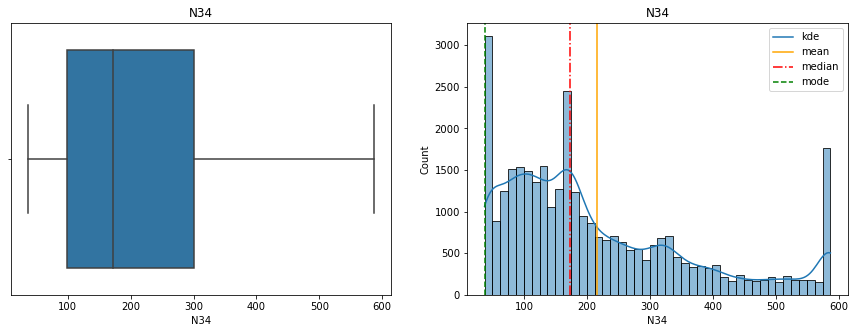

None


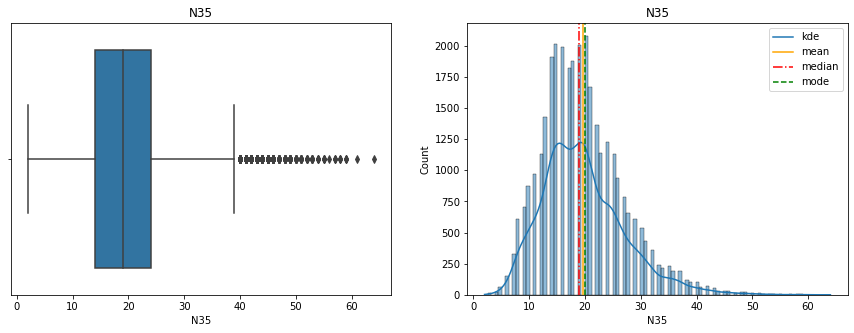

None


In [17]:
for column in X_train.select_dtypes(include=["number"]).columns:
    print(univariate_plot(X_train[column], column))


 - In the above Capping and Flooring technique method, we can still see the outliers presence in few columns but however we have mitigated the outliers to some extent in many columns 
 
 
 - Further treating the outliers may impact the characteristics, may change distortion or make the relationship between predictors and the target variable more complex and less interpretable
 
 
 - so let us leave it now and we can handle this outliers by taking any algorithm that is robust and not sensitive to outliers in the ML model building.

<h3 style="text-align:Left; font-family: Arial; font-weight: Bold">1.3.3 Missing Values Treatment:
 </h3>


In [21]:
X_train.shape 

(33050, 44)

In [22]:
(X_train.isna().sum()/len(X_train)).round(2) 

Unique_ID    0.00
C1           0.00
C2           0.00
C3           0.00
C4           0.00
C5           0.00
C6           0.00
C7           0.00
C8           0.00
N1           0.00
N2           0.14
N3           0.01
N4           0.14
N5           0.14
N6           0.01
N7           0.01
N8           0.00
N9           0.00
N10          0.01
N10.1        0.01
N11          0.02
N12          0.14
N14          0.02
N15          0.01
N16          0.14
N17          0.14
N18          0.14
N19          0.14
N20          0.14
N21          0.14
N22          0.14
N23          0.08
N24          0.00
N25          0.81
N26          0.81
N27          0.81
N28          0.81
N29          0.81
N30          0.81
N31          0.81
N32          0.81
N33          0.00
N34          0.00
N35          0.01
dtype: float64

In [23]:
(X_train.isna().sum()/len(X_train)).round(2) 

Unique_ID    0.00
C1           0.00
C2           0.00
C3           0.00
C4           0.00
C5           0.00
C6           0.00
C7           0.00
C8           0.00
N1           0.00
N2           0.14
N3           0.01
N4           0.14
N5           0.14
N6           0.01
N7           0.01
N8           0.00
N9           0.00
N10          0.01
N10.1        0.01
N11          0.02
N12          0.14
N14          0.02
N15          0.01
N16          0.14
N17          0.14
N18          0.14
N19          0.14
N20          0.14
N21          0.14
N22          0.14
N23          0.08
N24          0.00
N25          0.81
N26          0.81
N27          0.81
N28          0.81
N29          0.81
N30          0.81
N31          0.81
N32          0.81
N33          0.00
N34          0.00
N35          0.01
dtype: float64

  > Since the data is unknown with masked columns it is very challenging to find the type of missing nature and do the imputation according to it.


  > There are some columns with more than 80 percent missing which are N25, N26, N27, N28, N29, N30, N31 and N32. 


  > In general, any columns which are more than 80% missing does not provide any significant information for analysis. 


  > so dropping those columns is one best method


  > The columns that are mild to moderate missing, In this dataset the columns with less than or equal to 14 percent can be imputed with univariate imputations like mean/median/mode or multivariate approach like Knn or MICE algorithm


In [24]:
missing_value_proportions = X_train.isnull().mean()
missing_value_proportions1 = X_test.isnull().mean()

columns_to_drop = missing_value_proportions[missing_value_proportions >= 0.8].index
columns_to_drop1 = missing_value_proportions1[missing_value_proportions1 >= 0.8].index

X_train_dropped = X_train.drop(columns=columns_to_drop)

X_test_dropped = X_test.drop(columns=columns_to_drop1) 


In [25]:
from sklearn.impute import KNNImputer

X_train_imputed = X_train_dropped.copy()
X_test_imputed = X_test_dropped.copy() 

remaining_columns = X_train_imputed.columns[X_train_imputed.isnull().any()]
remaining_columns1 = X_test_imputed.columns[X_test_imputed.isnull().any()]

imputer = KNNImputer(n_neighbors=5)  

X_train_imputed[remaining_columns] = imputer.fit_transform(X_train_imputed[remaining_columns])
X_test_imputed[remaining_columns1] = imputer.fit_transform(X_test_imputed[remaining_columns1])


In [26]:
X_train_imputed.isna().sum() 

Unique_ID    0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
N1           0
N2           0
N3           0
N4           0
N5           0
N6           0
N7           0
N8           0
N9           0
N10          0
N10.1        0
N11          0
N12          0
N14          0
N15          0
N16          0
N17          0
N18          0
N19          0
N20          0
N21          0
N22          0
N23          0
N24          0
N33          0
N34          0
N35          0
dtype: int64

In [27]:
X_test_imputed.isna().sum()  

Unique_ID    0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
N1           0
N2           0
N3           0
N4           0
N5           0
N6           0
N7           0
N8           0
N9           0
N10          0
N10.1        0
N11          0
N12          0
N14          0
N15          0
N16          0
N17          0
N18          0
N19          0
N20          0
N21          0
N22          0
N23          0
N24          0
N33          0
N34          0
N35          0
dtype: int64

  > So far we have dropped the columns that contains more than 80 percent missing values and also implemented the multivariate KNN imputation.

In [23]:
X_train_imputed.head() 

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1,0.0,11.0,31.0,0.0,False,0.0,True,23.75,...,0.358,444.0,1.0,1.000,0.4,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1,4.0,2.0,41.0,2.0,False,1.0,True,11.05,...,0.060,25856.0,17.0,0.880,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1,0.0,19.0,2.0,0.0,False,0.0,True,29.00,...,0.622,937.0,12.4,0.654,1.2,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1,1.0,16.0,41.0,1.0,False,4.0,True,17.99,...,0.890,1006.0,6.0,1.000,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1,1.0,13.0,1.0,1.0,True,6.0,True,27.50,...,0.970,3398.0,31.0,0.960,0.0,44.000,7666.666667,100.0,205.47,21.0


In [28]:
# convert the C6 and C8 variables
for col in ('C6','C8'):
    X_train_imputed[col] = X_train_imputed[col].apply(lambda x: 1 if x is True else 0)
    X_test_imputed[col] = X_test_imputed[col].apply(lambda x: 1 if x is True else 0)


In [29]:
X_train_imputed.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1,0.0,11.0,31.0,0.0,0,0.0,1,23.75,...,0.358,444.0,1.0,1.000,0.4,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1,4.0,2.0,41.0,2.0,0,1.0,1,11.05,...,0.060,25856.0,17.0,0.880,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1,0.0,19.0,2.0,0.0,0,0.0,1,29.00,...,0.622,937.0,12.4,0.654,1.2,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1,1.0,16.0,41.0,1.0,0,4.0,1,17.99,...,0.890,1006.0,6.0,1.000,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1,1.0,13.0,1.0,1.0,1,6.0,1,27.50,...,0.970,3398.0,31.0,0.960,0.0,44.000,7666.666667,100.0,205.47,21.0


In [30]:
for col in ('C6','C8'):
    X_train_imputed[col] = pd.Categorical(X_train_imputed[col])
    

In [31]:
X_train_imputed.head() 

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1,0.0,11.0,31.0,0.0,0,0.0,1,23.75,...,0.358,444.0,1.0,1.000,0.4,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1,4.0,2.0,41.0,2.0,0,1.0,1,11.05,...,0.060,25856.0,17.0,0.880,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1,0.0,19.0,2.0,0.0,0,0.0,1,29.00,...,0.622,937.0,12.4,0.654,1.2,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1,1.0,16.0,41.0,1.0,0,4.0,1,17.99,...,0.890,1006.0,6.0,1.000,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1,1.0,13.0,1.0,1.0,1,6.0,1,27.50,...,0.970,3398.0,31.0,0.960,0.0,44.000,7666.666667,100.0,205.47,21.0


 ### 1.3.4 Correlaton 

In [32]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coff value
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [33]:
corr_features = correlation(X_train_imputed, 0.7)
len(corr_features)

6

In [34]:
corr_features

{'N11', 'N20', 'N34', 'N5', 'N6', 'N8'}

 - Using heatmap is very challenging because of huge number of features which results the cluttered plot.
 - These are the columns with multicollinearity but since the problem objective is to predict the non-linear model
 - so however it is not so that effective in model's perfomance by removing these columns and  will be similar for any tree models like Decision Tree, Random Forest etc..,

### 2.0. Split the data

#### 2.0.1 Feature engineering

In [35]:
X_train_imputed.to_csv('df.csv')
X_test_imputed.to_csv('X_test.csv')

In [37]:
X_test = pd.read_csv('X_test.csv', index_col=False)
X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]
X_test.shape 

(11017, 36)

In [38]:
df = pd.read_csv('df.csv', index_col=False)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.shape 

(33050, 36)

In [39]:
df.head()  

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_5926,1,0.0,11.0,31.0,0.0,0,0.0,1,23.75,...,0.358,444.0,1.0,1.000,0.4,27.816,1750.000000,58.0,113.39,12.0
1,Candidate_48134,1,4.0,2.0,41.0,2.0,0,1.0,1,11.05,...,0.060,25856.0,17.0,0.880,1.0,40.000,10833.333330,160.0,262.10,17.0
2,Candidate_51717,1,0.0,19.0,2.0,0.0,0,0.0,1,29.00,...,0.622,937.0,12.4,0.654,1.2,20.000,6250.000000,24.0,50.29,18.0
3,Candidate_26401,1,1.0,16.0,41.0,1.0,0,4.0,1,17.99,...,0.890,1006.0,6.0,1.000,0.0,26.000,2413.666667,70.0,126.52,27.0
4,Candidate_34872,1,1.0,13.0,1.0,1.0,1,6.0,1,27.50,...,0.970,3398.0,31.0,0.960,0.0,44.000,7666.666667,100.0,205.47,21.0


In [40]:
X_train_1 = df.iloc[:,1:].values 
X_test_1 = X_test.iloc[:,1:].values
Y_train_1 = Y_train.iloc[:,1].values 


In [41]:
Y_train_1.shape 

(33050,)

In [42]:
X_train_1.shape 

(33050, 35)

In [43]:
X_test_1.shape 

(11017, 35)

#### 2.0.2 Feature scaling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [46]:
# Split the available data into X_train, Y_train, and X_evaluation
x_train, x_validation, y_train_, y_validation = train_test_split(X_train_1, Y_train_1, test_size=0.2, random_state=42)


In [49]:
def Scaling_std(x_train, x_validation, X_test_1):
    scaler = StandardScaler() 

    X_train_scaled = scaler.fit_transform(x_train)
    X_validation_scaled = scaler.transform(x_validation)
    X_test_scaled = scaler.transform(X_test_1)
    
    return X_train_scaled, X_validation_scaled, X_test_scaled 

    


In [50]:
X_train_scaled, X_validation_scaled, X_test_scaled = Scaling_std(x_train, x_validation, X_test_1 )


 > Usually Feature Scaling is not useful for most of the tree based algorithms, but it might be helpful if we use any gradient descent based algos like logistic regression and  euclidean distance based algorithms like knn or kmeans algo's

#### **2.0.3 Regularization_feature_selection**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

def l1_regularization_feature_selection(X_train_scaled, y_train, X_validation_scaled, X_test_scaled, C_value):
    logistic_reg = LogisticRegression(penalty='l1', C=C_value, solver='liblinear')
    
    logistic_reg.fit(X_train_scaled, y_train)
    
    selector = SelectFromModel(logistic_reg, prefit=True)
    
    X_train_selected = selector.transform(X_train_scaled)
    X_evaluation_selected = selector.transform(X_validation_scaled)
    X_test_selected = selector.transform(X_test_scaled)

    selected_feature_indices = selector.get_support(indices=True)
    
    return X_train_selected, X_evaluation_selected, X_test_selected, selected_feature_indices

In [53]:
C_value = 1.0  

X_train_selected, X_evaluation_selected, X_test_selected, selected_feature_indices = l1_regularization_feature_selection(X_train_scaled, y_train_, X_validation_scaled,X_test_scaled, C_value)


 > There are many methods to apply for feature selection and dimension reduction individually
 
 > However, L1 regularization helps in preventing overfitting along with feature selection and dimensional reduction

### 3.0 Model Building

#### Base Model: Logistic Regression 

In [54]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score,validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [59]:
y_train = y_train_ 
y_evaluation = y_validation
X_test = X_test_selected 

In [60]:
log_reg = LogisticRegression(solver='liblinear')

kfold = KFold(n_splits=5, shuffle=True, random_state=42)   # Cross validation 

cv_scores = cross_val_score(log_reg, X_train_selected, y_train, cv=kfold, scoring='accuracy')
print('Cross-validation scores:', cv_scores)
print('Average cross-validation accuracy:', cv_scores.mean())
print('\n')

log_reg.fit(X_train_selected, y_train)

y_pred = log_reg.predict(X_evaluation_selected)

log_accuracy = accuracy_score(y_evaluation, y_pred) * 100
print(f'Logistic Regression accuracy score: {log_accuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_evaluation, y_pred)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred)
print('Classification report: ')
print(report)


Cross-validation scores: [0.72787443 0.73846445 0.73316944 0.72465961 0.72844175]
Average cross-validation accuracy: 0.7305219364599093


Logistic Regression accuracy score: 73.31


Confusion matrix: 
[[4204  391]
 [1373  642]]


Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.91      0.83      4595
           1       0.62      0.32      0.42      2015

    accuracy                           0.73      6610
   macro avg       0.69      0.62      0.62      6610
weighted avg       0.71      0.73      0.70      6610



 - The model accuracy is around 73 percentage
 - TN = 4204, FP = 391, FN = 1373, TP = 642 from the confusion matrix 
 - Also the precision,recall and f1 score for class 0 are 0.75, 0.91 and 0.83
 - The precision,recall and f1 score for class 1 are 0.62, 0.32 and 0.42
 - It seems the class 0 has more predictive power compared to the class 1
 - I have tried the tuning the threshold value for the binary classification that probability distribution >= 0.4 is 1 rather than taking the 0.5 for binary classification but it is giving even worse accuracy along with other metrics 
 - so, far the Model accuracy and the prediction power predction is not so bad. let us see further to improve the model performance if possible 

### 3.0.1 Model Evaluations

In [64]:
roc_auc = roc_auc_score(y_evaluation, y_pred)
print(f'ROC AUC score: {roc_auc:4.2f}')
print('\n')


log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_selected, y_train)

y_score = log_reg.predict_proba(X_evaluation_selected)[:, 1]  # Predict probabilities for positive class
print(y_score) 
print() 

fpr, tpr, thresholds = roc_curve(y_evaluation, y_score, pos_label=1)

auc_algo = auc(fpr, tpr)

print(f'ROC AUC score: {auc_algo:4.2f}')


ROC AUC score: 0.62


[0.14240644 0.30682217 0.15931017 ... 0.2251226  0.32268933 0.15958449]

ROC AUC score: 0.74


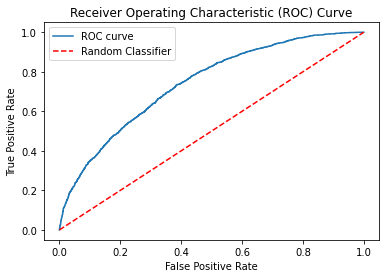

In [65]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### 3.0.2 Feature Creations and transformations

In [66]:
import numpy as np

# Compute statistical aggregations across numerical columns
X_train_aggregated = np.concatenate([np.mean(X_train_selected, axis=0),
                                     np.median(X_train_selected, axis=0),
                                     np.min(X_train_selected, axis=0),
                                     np.max(X_train_selected, axis=0),
                                     np.std(X_train_selected, axis=0)])

X_evaluation_aggregated = np.concatenate([np.mean(X_evaluation_selected, axis=0),
                                          np.median(X_evaluation_selected, axis=0),
                                          np.min(X_evaluation_selected, axis=0),
                                          np.max(X_evaluation_selected, axis=0),
                                          np.std(X_evaluation_selected, axis=0)])

# Transpose the aggregated features
X_train_aggregated = X_train_aggregated.reshape(1, -1)
X_evaluation_aggregated = X_evaluation_aggregated.reshape(1, -1)

# Concatenate the aggregated features with the original data
X_train_new = np.concatenate((X_train_selected, X_train_aggregated.repeat(X_train_selected.shape[0], axis=0)), axis=1)
X_evaluation_new = np.concatenate((X_evaluation_selected, X_evaluation_aggregated.repeat(X_evaluation_selected.shape[0], axis=0)), axis=1)


In [67]:
# Create interaction features by performing basic mathematical operations between pairs of numerical features
interaction_features_train = []
interaction_features_evaluation = []

for i in range(X_train_selected.shape[1]):
    for j in range(i + 1, X_train_selected.shape[1]):
        interaction_feature_train = X_train_selected[:, i] * X_train_selected[:, j]
        interaction_feature_evaluation = X_evaluation_selected[:, i] * X_evaluation_selected[:, j]
        interaction_features_train.append(interaction_feature_train.reshape(-1, 1))
        interaction_features_evaluation.append(interaction_feature_evaluation.reshape(-1, 1))

# Concatenate the interaction features with the original data
X_train_new = np.concatenate([X_train_selected] + interaction_features_train, axis=1)
X_evaluation_new = np.concatenate([X_evaluation_selected] + interaction_features_evaluation, axis=1)


In [22]:
log_reg = LogisticRegression(solver='liblinear')

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(log_reg, X_train_new, y_train, cv=kfold, scoring='accuracy')
print('Cross-validation scores:', cv_scores)
print('Average cross-validation accuracy:', cv_scores.mean())
print('\n')

log_reg.fit(X_train_new, y_train)

y_pred1 = log_reg.predict(X_evaluation_new)

log_accuracy = accuracy_score(y_evaluation, y_pred1) * 100
print(f'Logistic Regression accuracy score: {log_accuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_evaluation, y_pred1)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred1)
print('Classification report: ')
print(report)


Cross-validation scores: [0.73581694 0.7397882  0.7346823  0.73108926 0.72598336]
Average cross-validation accuracy: 0.7334720121028745


Logistic Regression accuracy score: 73.27


Confusion matrix: 
[[4085  510]
 [1257  758]]


Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      4595
           1       0.60      0.38      0.46      2015

    accuracy                           0.73      6610
   macro avg       0.68      0.63      0.64      6610
weighted avg       0.71      0.73      0.71      6610



 - The accuracy didn't change even after the feature creations but seems to be increase in True positives and decrease in True negatives 
 - so we can neglect this approach as it is just the try and ignore method.

### 3.0.3 Ensemble Technique's  Optimization

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [24]:
NB = GaussianNB()
NB.fit(X_train_selected, y_train)

y_pred2 = NB.predict(X_evaluation_selected)

NB_accuracy = accuracy_score(y_evaluation, y_pred2) * 100
print(f'NB accuracy score: {NB_accuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_evaluation, y_pred2)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred2)
print('Classification report: ')
print(report)


NB accuracy score: 71.04


Confusion matrix: 
[[4025  570]
 [1344  671]]


Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      4595
           1       0.54      0.33      0.41      2015

    accuracy                           0.71      6610
   macro avg       0.65      0.60      0.61      6610
weighted avg       0.69      0.71      0.69      6610



In [25]:
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn.fit(X_train_selected, y_train)

y_pred3 = knn.predict(X_evaluation_selected)

knn_accuracy = accuracy_score(y_evaluation, y_pred3) * 100
print(f'knn accuracy score: {knn_accuracy:4.2f}') 
print('\n')
cm = confusion_matrix(y_evaluation, y_pred3)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred3)
print('Classification report: ')
print(report)


knn accuracy score: 68.38


Confusion matrix: 
[[3775  820]
 [1270  745]]


Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      4595
           1       0.48      0.37      0.42      2015

    accuracy                           0.68      6610
   macro avg       0.61      0.60      0.60      6610
weighted avg       0.67      0.68      0.67      6610



In [26]:
dct = DecisionTreeClassifier(criterion= 'gini',max_depth=3, random_state=0)
dct.fit(X_train_selected, y_train)

y_pred3 = dct.predict(X_evaluation_selected)

dct_accuracy = accuracy_score(y_evaluation, y_pred3) * 100
print(f'DT accuracy score: {dct_accuracy:4.2f}') 
print('\n')
cm = confusion_matrix(y_evaluation, y_pred3)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred3)
print('Classification report: ')
print(report)


DT accuracy score: 71.36


Confusion matrix: 
[[4150  445]
 [1448  567]]


Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      4595
           1       0.56      0.28      0.37      2015

    accuracy                           0.71      6610
   macro avg       0.65      0.59      0.59      6610
weighted avg       0.69      0.71      0.68      6610



In [27]:
bag_cls = BaggingClassifier(base_estimator = dct, n_estimators=200, random_state=1 )
bag_cls.fit(X_train_selected, y_train)

y_pred3 = bag_cls.predict(X_evaluation_selected)

bag_cls_accuracy = accuracy_score(y_evaluation, y_pred3) * 100
print(f'bag_cls accuracy score: {bag_cls_accuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_evaluation, y_pred3)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred3)
print('Classification report: ')
print(report)


bag_cls accuracy score: 71.75


Confusion matrix: 
[[4239  356]
 [1511  504]]


Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      4595
           1       0.59      0.25      0.35      2015

    accuracy                           0.72      6610
   macro avg       0.66      0.59      0.59      6610
weighted avg       0.69      0.72      0.68      6610



In [28]:
Rnd_cls = RandomForestClassifier( n_estimators=200, random_state=1, max_features=3 )
Rnd_cls.fit(X_train_selected, y_train)

y_pred3 = Rnd_cls.predict(X_evaluation_selected)

Rnd_cls_accuracy = accuracy_score(y_evaluation, y_pred3) * 100
print(f'Rnd_cls accuracy score: {Rnd_cls_accuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_evaluation, y_pred3)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred3)
print('Classification report: ')
print(report)


Rnd_cls accuracy score: 74.60


Confusion matrix: 
[[4302  293]
 [1386  629]]


Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      4595
           1       0.68      0.31      0.43      2015

    accuracy                           0.75      6610
   macro avg       0.72      0.62      0.63      6610
weighted avg       0.73      0.75      0.71      6610



In [29]:
ada_bst = AdaBoostClassifier(base_estimator = dct, n_estimators=200,learning_rate=0.01, random_state=1 )
ada_bst.fit(X_train_selected, y_train)

y_pred3 = ada_bst.predict(X_evaluation_selected)

ada_bst_accuracy = accuracy_score(y_evaluation, y_pred3) * 100 
print(f'ada_bst accuracy score: {ada_bst_accuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_evaluation, y_pred3)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred3)
print('Classification report: ')
print(report)


ada_bst accuracy score: 73.07


Confusion matrix: 
[[4390  205]
 [1575  440]]


Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.96      0.83      4595
           1       0.68      0.22      0.33      2015

    accuracy                           0.73      6610
   macro avg       0.71      0.59      0.58      6610
weighted avg       0.72      0.73      0.68      6610



In [70]:
Grad_bst = GradientBoostingClassifier(n_estimators=200, random_state=1 )
Grad_bst.fit(X_train_selected, y_train)

y_pred3 = Grad_bst.predict(X_evaluation_selected)

Grad_bst_accuracy = accuracy_score(y_evaluation, y_pred3) * 100
print(f'Grad_bst accuracy score: {Grad_bst_accuracy:4.2f}') 
print('\n')
cm = confusion_matrix(y_evaluation, y_pred3)
print('Confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_evaluation, y_pred3)
print('Classification report: ')
print(report)


Grad_bst accuracy score: 74.55


Confusion matrix: 
[[4191  404]
 [1278  737]]


Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      4595
           1       0.65      0.37      0.47      2015

    accuracy                           0.75      6610
   macro avg       0.71      0.64      0.65      6610
weighted avg       0.73      0.75      0.72      6610



### 3.0.4 Model Selections

In [31]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', knn_accuracy),
      ('Logistic Regression', log_accuracy),
      ('Decision Tree ',dct_accuracy),
      ('Bagging',bag_cls_accuracy),
      ('Adaptive Boosting',ada_bst_accuracy),
      ('Gradient Boosting',Grad_bst_accuracy),
      ('Random Forest ',Rnd_cls_accuracy)]

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score'])

print('\033[1m''Current Scores ')
Scores.sort_values(by='Accuracy score',ascending=False) 


Current Scores 


,Model,Accuracy score
7,Random Forest,74.599092
6,Gradient Boosting,74.553707
2,Logistic Regression,73.267776
5,Adaptive Boosting,73.071104
4,Bagging,71.754917
3,Decision Tree,71.361573
0,Naive bayes,71.043873
1,KNN,68.381241


 - Along with accuracy, the precision and recall for positive label 1 is slighlty improved with in these algoithms which are Gradient boosting and Random Forest
 - So it is okay to consider any algorithm among the Gradient Boosting, Random Forest and Logistic Regression
 - The other algorithms are performing very worse in terms of False positve and True positive rates along with bad accuracy

 > Even after using Ensemble Techniques optimization, we couldn't see any huge improvement in accuracy compared to the logistic regression model
 
 > But, somehow there are few models that outperforming well with slight edge in comparison to the logistic regression

#### **Considering the Gradient Boost Algorithm as optimistic one **

In [33]:
roc_auc = roc_auc_score(y_evaluation, y_pred3)
print(f'ROC AUC score: {roc_auc:4.2f}')
print('\n')


Grad_bst = GradientBoostingClassifier(n_estimators=200, random_state=1 )
Grad_bst.fit(X_train_selected, y_train)

y_score = Grad_bst.predict_proba(X_evaluation_selected)[:, 1]  # Predict probabilities for positive class
print(y_score) 
print() 

fpr, tpr, thresholds = roc_curve(y_evaluation, y_score, pos_label=1)

auc_algo = auc(fpr, tpr)

print(f'ROC AUC score: {auc_algo:4.2f}')


ROC AUC score: 0.64


[0.13301046 0.27324569 0.14811731 ... 0.30951561 0.33696509 0.15177299]

ROC AUC score: 0.77


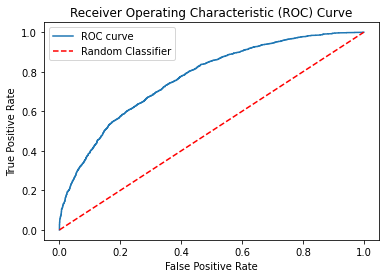

In [34]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


  > The Roc auc score we getting for the pos_label=1 is 0.77 which is considered to be quite good
  
  > With a value of 0.77, our model is demonstrating a moderate to strong ability to discriminate between positive and negative samples. It indicates that the model's predictions and the ordering of the probabilities are reasonably accurate, providing better-than-random performance.
  
  > As of now training and validation test is done. Now  we need to test the given X_test data 
   

### 4.0  Testing the X_test

In [61]:
X_test.shape 

(11017, 35)

In [73]:
y_score = Grad_bst.predict_proba(X_test)[:, 1]  # Predict probabilities for positive class
print(y_score) 
print() 



[0.42466234 0.28920954 0.40776121 ... 0.46642759 0.23275575 0.13921375]



In [74]:
y_score.shape 

(11017,)

In [76]:
x = pd.read_csv("E:\AI-ML PYTHON\Foundation\Z_dataset\DS Test\DS Test\Test\X_test.csv")
x.shape 

(11017, 44)

In [77]:
Index = x.iloc[:,0]


In [78]:
Index 

0         Candidate_1602
1        Candidate_29650
2        Candidate_31061
3         Candidate_5768
4        Candidate_27059
              ...       
11012     Candidate_7453
11013    Candidate_38211
11014    Candidate_25020
11015    Candidate_44501
11016    Candidate_49327
Name: Unique_ID, Length: 11017, dtype: object

In [81]:
prediction_file =  pd.DataFrame({'Unique_ID': Index , 'Class_1_Probability_pred': y_score})


In [82]:
prediction_file.head() 

,Unique_ID,Class_1_Probability_pred
0,Candidate_1602,0.424662
1,Candidate_29650,0.289210
2,Candidate_31061,0.407761
3,Candidate_5768,0.218004
4,Candidate_27059,0.380172


In [83]:
prediction_file.shape 

(11017, 2)

In [84]:
prediction_file.to_csv('Prediction_file.csv', index=False ) 

In [62]:
submissionfile = pd.read_csv(r"E:\AI-ML PYTHON\Foundation\Z_dataset\DS Test\DS Test\sample_submission_file.csv")
submissionfile 


,Unique_ID,Class_1_Probability
0,Candidate_17537,0.5
1,Candidate_21230,0.5
2,Candidate_41937,0.5
3,Candidate_19223,0.5
4,Candidate_34995,0.5
...,...,...
11012,Candidate_39442,0.5
11013,Candidate_40008,0.5
11014,Candidate_25340,0.5
11015,Candidate_3275,0.5


<h1 style="text-align:center; font-family: Arial; font-weight: normal">The End </h1>


<div style="margin: 0 auto; width: 50%; border-top: 3px solid black;"></div>
